# Importing the libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from matplotlib.ticker import FuncFormatter
from pandas.plotting import register_matplotlib_converters
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

register_matplotlib_converters
%matplotlib inline

### Importing the datasets

In [2]:
def import_df(path, column, new_col_name, formatting=0, remove_unnamed=True):
    df = pd.read_excel(("Original MIT data/" + path))
    if remove_unnamed == True:
        df = df.drop(["Unnamed: 1"], axis=1)
    else:
        pass
    df = df[4:]
    df = df.transpose()
    df = pd.DataFrame(df.iloc[1:, column])
    df["Year"] = np.arange(1995, 2019, 1)
    df.reset_index(drop=True, inplace=True)
    df.set_index("Year", inplace=True)
    df = df * (10 ** (formatting))
    df.rename(columns={(column + 4): new_col_name}, inplace=True)
    return df

In [3]:
# each dataframe will form a single column for the final dataframe

## Revenues

# Importing and creating a dataframe of all revenue related metric totals (Domestic + International + Others)
# total system revenue
total_revenue = import_df(
    path='Total revenue/System Total Operating Revenue.xls',
    column=25,
    new_col_name='Total Operating Revenue ($)',
    formatting=9,
)
# revenue per asm
rev_per_asm = import_df(
    'Total revenue/System Total Revenue (Ex- Transport Related) per ASM.xls',
    23,
    'System Revenue Per ASM (exc-transport) ($ per ASM)',
    -2,
)
# System Passenger revenue
sys_pass_rev = import_df(
    'Total revenue/System Passenger Revenue.xls', 25, "System Passenger Revenue ($)", 9
)
# PRASM
PRASM = import_df(
    'Total revenue/System Passenger Revenue per Available Seat Mile (PRASM).xls',
    23,
    'System Passenger Revenue per ASM ($)',
    9,
)
# System Passenger yield, revenue per mile
pass_yield = import_df(
    'Total revenue/System Passenger Yield.xls',
    23,
    'System Passenger Yield ($ per RPM)',
    -2,
)
# System Total transport related revenue
trans_rev = import_df(
    'Total revenue/System Total Transport Related Revenue.xls',
    25,
    'System Total Transport Related Revenue ($)',
    9,
)
# Ancillary fees revenue
ancillary = import_df(
    'Total revenue/Ancillary Fee Revenue.xls', 23, 'Ancillary Fees ($)', 3
)
# all Revenues table
revenue = pd.concat(
    [total_revenue, sys_pass_rev, trans_rev, PRASM, rev_per_asm, pass_yield, ancillary],
    axis=1,
)
revenue = revenue.astype('float64')


# Employee compensation

# full time employee equivalents
FT_equiv = import_df(
    'Total employee compensation/Total Full-time Employee Equivalents.xls',
    23,
    'Full Time Employees Equivalents',
)
# full time non cockpit employee equivalents
FT_NC_equiv = import_df(
    'Total employee compensation/Total Full-time Employee Non Cockpit Equivalents.xls',
    23,
    'Full Time Non Cockpit Employees Equivalents',
)
# all employees Avg wage
all_wages_avg = import_df(
    'Total employee compensation/Average Annual Wages and Salaries - All Employees.xls',
    24,
    'All Employees Avg Wage ($)',
)
# non cockpit employees Avg wage.
NC_wages_avg = import_df(
    'Total employee compensation/Average Annual Wages and Salaries - All Non-Cockpit Employees.xls',
    24,
    'Non Cockpit Employees Avg Wage ($)',
)
# all employees avg benefits
all_benefits = import_df(
    'Total employee compensation/Average Pension and Benefit Package - ALL EMPLOYEES.xls',
    24,
    'All Employees average benefits and pensions ($)',
)
# Non cockpit employees avg benefits
NC_benefits = import_df(
    'Total employee compensation/Average Pension and Benefit Package - ALL NON-COCKPIT EMPLOYEES.xls',
    24,
    'Non-Cockpit Employees average benefits and pensions ($)',
)
# Pilot employee equivalents
pilot_equiv = import_df(
    'Total employee compensation/Total Pilot and Copilot Employee Equivalents.xls',
    23,
    'Pilot and Co-Pilot equivalents',
)
# Pilot employee wages
pilot_wage = import_df(
    'Total employee compensation/Average Annual Wages and Salaries - PILOT AND CO-PILOT PERSONNEL.xls',
    24,
    'Average Pilot and Co-Pilot wages ($)',
)
# flight attendant equivalents
FA_equiv = import_df(
    'Total employee compensation/Total Flight Attendant Employee Equivalents.xls',
    23,
    'Flight Attendant Employee Equivalents',
)
# flight attendant wages
FA_wage = import_df(
    'Total employee compensation/Average Annual Wages and Salaries - FLIGHT ATTENDANT PERSONNEL.xls',
    24,
    'Average Flight Attendant Employee Wage ($)',
)
# ground staff equivalents
ground_equiv = import_df(
    'Total employee compensation/Total In-House Passenger, Cargo and Aircraft Handling Employee Equivalents.xls',
    23,
    'Ground Staff Employee Equivalents',
)
# average ground staff wages
avg_ground_wage = import_df(
    'Total employee compensation/Average Annual Wages and Salaries - INHOUSE PASSENGER, CARGO AND AIRCRAFT HANDLING PERSONNEL.xls',
    24,
    'Average Ground Staff Employee Wage ($)',
)
# maintenance employee equivalents
maint_equiv = import_df(
    'Total employee compensation/Total In-House Maintenance Employee Equivalents.xls',
    23,
    'Maintenance Staff Equivalents',
)
# average maintenance employee wage
maint_wage = import_df(
    'Total employee compensation/Average Annual Wages and Salaries - INHOUSE MAINTENANCE PERSONNEL.xls',
    24,
    'Average Maintenance Staff Wage ($)',
)
# Management equivalents
mgmnt_equiv = import_df(
    'Total employee compensation/Total Management and Other Employee Equivalents.xls',
    23,
    'Management and Others Equivalents',
)
# Management wage
mgmnt_wage = import_df(
    'Total employee compensation/Average Annual Wages and Salaries - GENERAL MANAGEMENT AND OTHER PERSONNEL.xls',
    24,
    'Average Management and Others Wage ($)',
)
# all compensations table
compensation = pd.concat(
    [
        all_wages_avg,
        NC_wages_avg,
        FT_equiv,
        FT_NC_equiv,
        all_benefits,
        NC_benefits,
        pilot_equiv,
        pilot_wage,
        FA_equiv,
        FA_wage,
        ground_equiv,
        avg_ground_wage,
        maint_equiv,
        maint_wage,
        mgmnt_equiv,
        mgmnt_wage,
    ],
    axis=1,
)
compensation = compensation.astype('float64')

# Productivity
# ASM per $ employee compensation
asm_per_comp = import_df(
    'Total employees and productivity/Total ASMs Produced per Dollar of Employee Compensation.xls',
    23,
    'ASM Prodcued per Dollar Employee Compensation',
)
# ASM produced per equivalent employee
asm_per_equiv = import_df(
    'Total employees and productivity/Total ASMs Produced per Employee Equivalent.xls',
    23,
    'ASM Prodcued per Employee Equivalent',
)
# ASM produced per dollar pilot compensation
asm_per_pilot_comp = import_df(
    'Total employees and productivity/Total ASMs Produced per Dollar of Total Pilot Compensation.xls',
    24,
    'ASM Prodcued per Dollar Pilot Compensation',
)
# Flight Attendant average block hours per month
FA_avg_hours = import_df(
    'Total employees and productivity/Total Flight Attendant Average Block Hours per Month.xls',
    24,
    'Total Flight Attendant Block Hours per Month',
)
# % of maintenance expense outsource
maint_out = import_df(
    'Total employees and productivity/Percent of Maintenance Expenses Outsourced.xls',
    24,
    'Percentage of maintenance expense outsourced',
)
# Handling employees per a/c
handling_per_ac = import_df(
    'Total employees and productivity/Passenger, Cargo and Aircraft Handling Employees per Aircraft.xls',
    24,
    'Handling Employees per Aircraft',
)
# all productivity table
productivity = pd.concat(
    [
        asm_per_equiv,
        asm_per_comp,
        asm_per_pilot_comp,
        FA_avg_hours,
        maint_out,
        handling_per_ac,
    ],
    axis=1,
)
productivity = productivity.astype('float64')

# Expenses

# total operating expenses
total_op_expense = import_df(
    'Total Expenses related/System Total Operating Expenses.xls',
    25,
    'Total Operating Expenses ($)',
    9,
)
# labour expenses
labour_exp = import_df(
    'Total Expenses related/System Total Labor and Related Expenses.xls',
    23,
    'Total Labour Operating Expenses ($)',
    9,
)
# labour expenses per ASM (LCASM)
LCASM = import_df(
    'Total Expenses related/System Total Labor and Related Expense per Available Seat Mile (LCASM).xls',
    23,
    ' Total Labour Operating Expenses per ASM($)',
    9,
)
# Total Fuel expense
fuel_exp = import_df(
    'Total Expenses related/Total Fuel Expense.xls', 23, 'Total Fuel Expenses ($)', 6
)
# Total gallons of fuel
fuel_gallons = import_df(
    'Total Expenses related/Total Gallons of Fuel.xls', 23, 'Total Fuel in Gallons', 6
)
# Price per gallon fuel
fuel_price = import_df(
    'Total Expenses related/Total Price per Gallon of Fuel.xls',
    23,
    'Fuel price per Gallon ($)',
)
# fuel expenses per ASM
fuel_asm = import_df(
    'Total Expenses related/Fuel Expense per ASM.xls', 23, 'Total Fuel Expense per ASM'
)
# fuel expense per passenger
fuel_per_pass = import_df(
    'Total Expenses related/Fuel Expense per Enplaned Passenger.xls',
    23,
    'Fuel Expense per Enplaned Passenger ($)',
)
# CASM ex transport
casm_ex_trans = import_df(
    'Total Expenses related/System Total Expense per Available Seat Mile (CASM ex Transport Related).xls',
    23,
    'CASM excluding Transport ($ per ASM)',
    -2,
)
# CASM ex transport, fuel
casm_ex_trans_fuel = import_df(
    'Total Expenses related/System Total Expense per Available Seat Mile (CASM ex fuel and Transport Related).xls',
    23,
    'CASM excluding Transport and Fuel ($ per ASM)',
    -2,
)
# CASM ex transport, fuel, labour
casm_ex_trans_fuel_lab = import_df(
    'Total Expenses related/System Non-Labor Expense per Available Seat Mile (CASM ex fuel, Transport Related and Labor).xls',
    23,
    'CASM excluding Transport Fuel and labour ($ per ASM)',
    -2,
)
# transport related
transport_exp = import_df(
    'Total Expenses related/Transport Related Expenses.xls',
    23,
    'Transport Related Expenses ($)',
    6,
)
# other outsourcing
outsource_exp = import_df(
    'Total Expenses related/Total Other Outsourcing Expense.xls',
    23,
    'Other Outsourcing Expenses ($)',
    6,
)
# management and other
mgmnt_exp = import_df(
    'Total Expenses related/System Total Management and Other.xls',
    23,
    'Management and Other Expenses ($)',
    9,
)
# mgmnt and other per ASM
mgmnt_asm = import_df(
    'Total Expenses related/System Management and Other Expense per Available Seat Mile.xls',
    23,
    'Management and Other Expenses per ASM',
)
# flight equipment maintenance
equip_maint_exp = import_df(
    'Total Expenses related/Total Flight Equipment Maintenance Expense.xls',
    23,
    'Flight Equipment Maintenance Expense ($)',
    6,
)
# outsource flight equipment maintenance
outs_equip_maint = import_df(
    'Total Expenses related/Total Outsourced Flight Equipment Maintenance Expense.xls',
    23,
    'Outsourced Flight Equipment Maintenance Expense ($)',
    6,
)
# all expenses table
expenses = pd.concat(
    [
        total_op_expense,
        labour_exp,
        LCASM,
        fuel_exp,
        fuel_asm,
        fuel_per_pass,
        fuel_gallons,
        fuel_price,
        transport_exp,
        outsource_exp,
        mgmnt_exp,
        mgmnt_asm,
        equip_maint_exp,
        outs_equip_maint,
        casm_ex_trans,
        casm_ex_trans_fuel,
        casm_ex_trans_fuel_lab,
    ],
    axis=1,
)
expenses = expenses.astype('float64')

# Fleet

# total operating fleet
op_fleet = import_df(
    'Total fleet/Total Operating Fleet.xls', 23, 'Total operating fleet numbers'
)
# aircraft block hours
ac_block_hours = import_df(
    'Total fleet/Total Aircraft Block Hours - ALL AIRCRAFT.xls',
    24,
    'Total Aircraft Block Hours',
)
# aircraft airborne hours
ac_airborne_hours = import_df(
    'Total fleet/Total Aircraft Airborne Hours - ALL AIRCRAFT.xls',
    24,
    'Total Aircraft Airborne Hours',
)
# Gallons of fuel per block hour
gallons_per_block_hour = import_df(
    'Total fleet/Gallons of Fuel per Block Hour - ALL AIRCRAFT.xls',
    24,
    'Gallons Fuel per Block Hour',
)
# Average stage length flown
avg_stage_length = import_df(
    'Total fleet/Average Stage Length Flown of Total Operating Fleet.xls',
    23,
    'Average Stage Length Flown',
)
# Average seat capacity
avg_seat_capacity = import_df(
    'Total fleet/Average Seat Capacity of Total Operating Fleet.xls',
    23,
    'Average Seat Capacity per Aircraft',
)
# Departure per aircraft day
dep_per_ac = import_df(
    'Total fleet/Departure per Aircraft Day - ALL AIRCRAFT.xls',
    21,
    'Departure per Aircraft Day',
    remove_unnamed=False,
)
# all total fleet data
fleet = pd.concat(
    [
        op_fleet,
        ac_block_hours,
        ac_airborne_hours,
        gallons_per_block_hour,
        avg_stage_length,
        avg_seat_capacity,
        dep_per_ac,
    ],
    axis=1,
)
fleet = fleet.astype('float64')

# Traffic and Capacity

# total asm
total_asm = import_df(
    'Total traffic and capacity by op region/Total System Available Seat Miles.xls',
    25,
    'Total Available Seat Miles (ASM)',
    6,
)
# total rpm
total_rpm = import_df(
    'Total traffic and capacity by op region/Total System Revenue Passenger Miles.xls',
    25,
    'Total Revenue Passenger Mile (RPM)',
    6,
)
# total enplaned passengers
total_pass = import_df(
    'Total traffic and capacity by op region/System Total Enplaned Passengers.xls',
    23,
    'Total Enplaned Passengers',
    3,
)
# total load factor
total_load = import_df(
    'Total traffic and capacity by op region/Total System Load Factor.xls',
    23,
    'Total Load Factor (%)',
    2,
)
# total passenger yield
total_yield = import_df(
    'Total traffic and capacity by op region/Total System Passenger Yield.xls',
    23,
    'Total Passenger Yield ($ per RPM)',
    -2,
)
# total passenger revenue per asm
total_rev_per_asm = import_df(
    'Total traffic and capacity by op region/Total System Passenger Revenue per ASM.xls',
    23,
    'Total Passenger RPM per ASM ($ per ASM)',
    -2,
)
# departed seats
dep_seats = import_df(
    'Total traffic and capacity by op region/Departed Seats.xls',
    21,
    'Total Departed Seats',
    3,
    remove_unnamed=False,
)
total_traffic = pd.concat(
    [
        total_asm,
        total_rpm,
        total_pass,
        total_yield,
        total_rev_per_asm,
        total_load,
        dep_seats,
    ],
    axis=1,
)
total_traffic = total_traffic.astype('float64')


# Domestic
# asm
dom_asm = import_df(
    'Total traffic and capacity by op region/Domestic Available Seat Miles .xls',
    25,
    'Domestic ASM',
)
# asm % total asm
dom_asm_perc = import_df(
    'Total traffic and capacity by op region/Domestic Available Seat Miles as  a Percent of Total System Available Seat Miles.xls',
    23,
    'Domestic ASM as % of total ASM',
    2,
)
# revenue % total revenue
dom_rev_perc = import_df(
    'Total traffic and capacity by op region/Domestic Passenger Revenue as a Percent of Total System Revenue.xls',
    23,
    'Domestic Revenue as % of total Revenue',
    2,
)
# revenue per asm
dom_rev_per_asm = import_df(
    'Total traffic and capacity by op region/Domestic Passenger Revenue per ASM.xls',
    23,
    'Domestic Revenue ($) per ASM',
    -2,
)
# passenger yeild
dom_pass_yield = import_df(
    'Total traffic and capacity by op region/Domestic Passenger Yield.xls',
    23,
    'Domestic Passenger Yield ($ per RPM)',
    -2,
)
# RPM
dom_rpm = import_df(
    'Total traffic and capacity by op region/Domestic Revenue Passenger Miles.xls',
    25,
    'Domestic RPM',
    6,
)
# rpm % total rpm
dom_rpm_perc = import_df(
    'Total traffic and capacity by op region/Domestic Revenue Passenger Miles as a Percent of Total System Revenue Passenger Miles.xls',
    23,
    'Domestic RPM as % of total RPM',
    2,
)
# revenue
dom_rev = import_df(
    'Total traffic and capacity by op region/Passenger Revenue -- Domestic Operations.xls',
    25,
    'Domestic Passenger Revenue ($)',
    6,
)
# load factor
dom_load_factor = import_df(
    'Total traffic and capacity by op region/Domestic Load Factor.xls',
    23,
    'Domestic Load Factor (%)',
    2,
)
# all domestic data
dom_traffic = pd.concat(
    [
        dom_asm,
        dom_asm_perc,
        dom_rev_perc,
        dom_rev_per_asm,
        dom_pass_yield,
        dom_rpm,
        dom_rpm_perc,
        dom_rev,
        dom_load_factor,
    ],
    axis=1,
)
dom_traffic = dom_traffic.astype('float64')

# International
# asm
inter_asm = import_df(
    'Total traffic and capacity by op region/International Available Seat Miles .xls',
    25,
    'International ASM',
    6,
)
# asm % total asm
inter_asm_perc = import_df(
    'Total traffic and capacity by op region/International Available Seat Miles as  a Percent of Total System Available Seat Miles.xls',
    23,
    'Internation ASM as % of total ASM',
    2,
)
# revenue % total revenue
inter_rev_perc = import_df(
    'Total traffic and capacity by op region/International Passenger Revenue as a Percent of Total System Revenue.xls',
    23,
    'International Revenue as % of total Revenue',
    2,
)
# revenue per asm
inter_rev_per_asm = import_df(
    'Total traffic and capacity by op region/International Passenger Revenue per ASM.xls',
    23,
    'International Revenue ($) per ASM',
    -2,
)
# passenger yeild
inter_pass_yield = import_df(
    'Total traffic and capacity by op region/International Passenger Yield.xls',
    23,
    'International Passenger Yield ($ per RPM)',
    -2,
)
# RPM
inter_rpm = import_df(
    'Total traffic and capacity by op region/International Revenue Passenger Miles.xls',
    25,
    'International RPM',
    6,
)
# rpm % total rpm
inter_rpm_perc = import_df(
    'Total traffic and capacity by op region/International Revenue Passenger Miles as a Percent of Total System Revenue Passenger Miles.xls',
    23,
    'International RPM as % of total RPM',
    2,
)
# revenue
inter_rev = import_df(
    'Total traffic and capacity by op region/Passenger Revenue -- International Operations.xls',
    25,
    'International Passenger Revenue ($)',
    6,
)
# load factor
inter_load_factor = import_df(
    'Total traffic and capacity by op region/International Load Factor .xls',
    23,
    'International Load Factor',
    2,
)
inter_traffic = pd.concat(
    [
        inter_asm,
        inter_asm_perc,
        inter_rev_perc,
        inter_rev_per_asm,
        inter_pass_yield,
        inter_rpm,
        inter_rpm_perc,
        inter_rev,
        inter_load_factor,
    ],
    axis=1,
)
inter_traffic = inter_traffic.astype('float64')

In [4]:
# Revenue - recreate table with individual airlines and their types
airline_rev = pd.read_excel(
    "Original MIT data/Total revenue/System Total Operating Revenue.xls"
)
airline_rev = airline_rev.drop(["Unnamed: 1"], axis=1)  # removing empty column
airline_rev = airline_rev.transpose()  # transposing data frame
header = airline_rev.iloc[0]  # make new list of header _revfrom airline names
airline_rev = airline_rev[1:]  # deleting unwanted row
airline_rev = airline_rev.rename(
    columns=header
)  # replacing the column headers with list header we just made
Year = np.arange(1995, 2019, 1)
airline_rev["Year"] = Year  # make a series to fill in year column
airline_rev = airline_rev.loc[
    :,
    [
        "Year",
        "American",
        "Delta",
        "United",
        " --sub Network",
        "Southwest",
        "Frontier",
        "Alaska",
        " -- sub LCC",
        "Hawaiian",
        "Spirit",
        " -- sub Other",
        "Total Industry",
    ],
]  # take relevant columns only

airline_rev.reset_index(drop=True, inplace=True)  # reset index
airline_rev.set_index("Year", inplace=True)  # make year the new index
airline_rev = airline_rev * 10**9
airline_rev.astype('float64')

# Revenue Individual airlines
American_rev = airline_rev["American"].sum()
Delta_rev = airline_rev["Delta"].sum()
United_rev = airline_rev["United"].sum()
Southwest_rev = airline_rev["Southwest"].sum()
Frontier_rev = airline_rev["Frontier"].sum()
Alaska_rev = airline_rev["Alaska"].sum()
Hawaiian_rev = airline_rev["Hawaiian"].sum()
Spirit_rev = airline_rev["Spirit"].sum()

airlines_rev = np.array(
    [
        American_rev,
        Delta_rev,
        United_rev,
        Southwest_rev,
        Frontier_rev,
        Alaska_rev,
        Hawaiian_rev,
        Spirit_rev,
    ]
)
Labels1 = [
    "",
    "American",
    "Delta",
    "United",
    "Southwest",
    "Frontier",
    "Alaska",
    "Hawaiian",
    "Spirit",
]

# airline types
network_rev = airline_rev[" --sub Network"].sum()
LCC_rev = airline_rev[" -- sub LCC"].sum()
Other_rev = airline_rev[" -- sub Other"].sum()

airline_types_rev = [network_rev, LCC_rev, Other_rev]
Labels2 = ["", "Network", "LCC", "Other"]

# Expenses - recreate table with individual airlines and their types
airline_exp = pd.read_excel(
    "Original MIT data/Total Expenses related/System Total Operating Expenses.xls"
)
airline_exp = airline_exp.transpose()  # transposing data frame
header = airline_exp.iloc[0]  # make new list of header from airline names
airline_exp = airline_exp.rename(
    columns=header
)  # replacing the column headers with list header we just made
airline_exp = airline_exp[2:]
Year = np.arange(1995, 2019, 1)
airline_exp["Year"] = Year  # make a series to fill in year column
airline_exp = airline_exp.loc[
    :,
    [
        "Year",
        "American",
        "Delta",
        "United",
        " --sub Network",
        "Southwest",
        "Frontier",
        "Alaska",
        " -- sub LCC",
        "Hawaiian",
        "Spirit",
        " -- sub Other",
        "Total Industry",
    ],
]  # take relevant columns only
airline_exp.reset_index(drop=True, inplace=True)  # reset index
airline_exp.set_index("Year", inplace=True)  # make year the new index
airline_exp = airline_exp * 10**9
airline_exp.astype('float64')

# Expenses - Individual airlines
American_exp = airline_exp["American"].sum()
Delta_exp = airline_exp["Delta"].sum()
United_exp = airline_exp["United"].sum()
Southwest_exp = airline_exp["Southwest"].sum()
Frontier_exp = airline_exp["Frontier"].sum()
Alaska_exp = airline_exp["Alaska"].sum()
Hawaiian_exp = airline_exp["Hawaiian"].sum()
Spirit_exp = airline_exp["Spirit"].sum()

airlines_exp = np.array(
    [
        American_exp,
        Delta_exp,
        United_exp,
        Southwest_exp,
        Frontier_exp,
        Alaska_exp,
        Hawaiian_exp,
        Spirit_exp,
    ]
)
Labels3 = [
    "",
    "American",
    "Delta",
    "United",
    "Southwest",
    "Frontier",
    "Alaska",
    "Hawaiian",
    "Spirit",
]

network_exp = airline_exp[" --sub Network"].sum()
LCC_exp = airline_exp[" -- sub LCC"].sum()
Other_exp = airline_exp[" -- sub Other"].sum()

airline_types_exp = np.array([network_exp, LCC_exp, Other_exp])
airline_types_rev = np.array(
    [
        airline_rev[" --sub Network"].sum(),
        airline_rev[" -- sub LCC"].sum(),
        airline_rev[" -- sub Other"].sum(),
    ]
)

Labels4 = [" ", "Network", "LCC", "Other"]

# profits
airlines_prof = airlines_rev - airlines_exp

airline_types_prof = airline_types_rev - airline_types_exp

In [5]:
# passengers enplaned - recreate table with individual airlines and their types
airline_pass = pd.read_excel(
    "Original MIT data/Total traffic and capacity by op region/System Total Enplaned Passengers.xls"
)
airline_pass = airline_pass.drop(["Unnamed: 1"], axis=1)  # removing empty column
airline_pass = airline_pass.transpose()  # transposing data frame
header = airline_pass.iloc[0]  # make new list of header _revfrom airline names
airline_pass = airline_pass[1:]  # deleting unwanted row
airline_pass = airline_pass.rename(
    columns=header
)  # replacing the column headers with list header we just made

# airline_pass.reindex(columns=filtered_columns)
Year = np.arange(1995, 2019, 1)
airline_pass["Year"] = Year  # make a series to fill in year column

airline_pass = airline_pass.loc[
    :,
    [
        "Year",
        "American",
        "Delta",
        "United",
        " --sub Network",
        "Southwest",
        "Frontier",
        "Alaska",
        " --sub LCC",
        "Hawaiian",
        "Spirit",
        " -- sub Other",
        "Total All Sectors",
    ],
]  # take relevant columns only

airline_pass.reset_index(drop=True, inplace=True)  # reset index
airline_pass.set_index("Year", inplace=True)  # make year the new index
airline_pass = airline_pass * 10**3
airline_pass.astype('float64')

# Revenue Individual airlines
American_pass = airline_rev["American"].sum()
Delta_pass = airline_rev["Delta"].sum()
United_pass = airline_rev["United"].sum()
Southwest_pass = airline_rev["Southwest"].sum()
Frontier_pass = airline_rev["Frontier"].sum()
Alaska_pass = airline_rev["Alaska"].sum()
Hawaiian_pass = airline_rev["Hawaiian"].sum()
Spirit_pass = airline_rev["Spirit"].sum()

airlines_pass = np.array(
    [
        American_pass,
        Delta_pass,
        United_pass,
        Southwest_pass,
        Frontier_pass,
        Alaska_pass,
        Hawaiian_pass,
        Spirit_pass,
    ]
)
pass_labels = [
    "American",
    "Delta",
    "United",
    "Southwest",
    "Frontier",
    "Alaska",
    "Hawaiian",
    "Spirit",
]

# airline types
network_pass = airline_pass[" --sub Network"].sum()
LCC_pass = airline_pass[" --sub LCC"].sum()
Other_pass = airline_pass[" -- sub Other"].sum()

airline_types_pass = [network_pass, LCC_pass, Other_pass]
pass_type_labels = ["Network", "LCC", "Other"]

In [6]:
df = pd.concat(
    [
        revenue,
        inter_traffic,
        dom_traffic,
        total_traffic,
        fleet,
        expenses,
        productivity,
        compensation,
    ],
    axis=1,
)
df.shape

(24, 78)

In [7]:
# profits
df["Total Profits"] = (
    df["Total Operating Revenue ($)"] - df["Total Operating Expenses ($)"]
)

# Number of flights per year and day
df["Flights per Year"] = (
    df["Total Departed Seats"] / df["Average Seat Capacity per Aircraft"]
) / 1000
df["Flights per day"] = (
    df["Total Departed Seats"] / df["Average Seat Capacity per Aircraft"]
) / (365)

In [8]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

Scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
df_scaled = Scaler.fit_transform(df)
df_normal = pd.DataFrame(df_scaled)

pca = PCA(n_components=2)
pca.fit(df_normal)
print(
    "First principle component accounts for ",
    pca.explained_variance_ratio_[0],
    "of all variance",
)
print(
    "Second principle component accounts for ",
    pca.explained_variance_ratio_[1],
    "of all variance",
)
df_normal.head()

First principle component accounts for  0.6867040114074284 of all variance
Second principle component accounts for  0.1667281472400422 of all variance


,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,0.000000,0.000000,0.000000,0.088703,0.074613,0.404236,0.000015,0.000000,0.023000,0.158399,...,0.018449,0.637170,0.087866,0.158759,0.152583,0.853594,0.000000,0.493975,0.618992,0.618992
1,0.059615,0.084346,0.008341,0.184757,0.155236,0.442223,0.000000,0.029143,0.027319,0.086399,...,0.096750,0.700360,0.107276,0.016791,0.347170,0.791366,0.018202,0.500992,0.623977,0.623977
2,0.119315,0.145044,0.065866,0.228792,0.198210,0.468413,0.000285,0.091304,0.093985,0.116840,...,0.202625,0.631287,0.229383,0.734547,0.052679,0.602572,0.068557,0.549231,0.701207,0.701207
3,0.146993,0.167008,0.097260,0.211909,0.181096,0.434382,0.073071,0.144038,0.176527,0.027929,...,0.094815,0.450401,0.328346,0.826646,0.032673,0.613117,0.047287,0.564581,0.710381,0.710381
4,0.192271,0.215337,0.122367,0.182670,0.155866,0.384019,0.079840,0.188359,0.140234,0.000000,...,0.055682,0.881928,0.320878,1.000000,0.000000,0.860026,0.067726,0.545536,0.845127,0.845127


(24, 2)


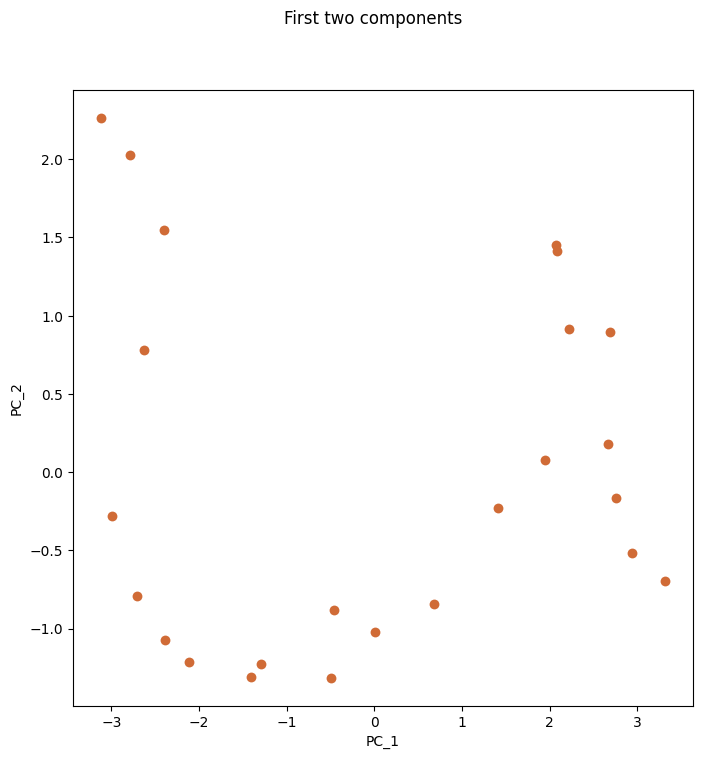

In [9]:
df_projected = pca.transform(df_normal)
print(df_projected.shape)
plt.figure(figsize=(8, 8))
plt.suptitle('First two components')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.scatter(df_projected[:, 0], df_projected[:, 1], c="#D06B36", s=50, linewidth=0)
# need to normalise range normalise, scale with min and max or wrt to std with z scores for more robust

In [10]:
column_names = np.asarray(df.columns.values)
# show top 10 loadings of PC 1
pc_1_loadings = np.asarray(pca.components_[0])[
    np.argsort(np.abs(pca.components_[0]))[::-1]
][0:10]
pc_1_names = np.asarray(column_names)[np.argsort(np.abs(pca.components_[0]))[::-1]][
    0:10
]

for i in range(0, 10):
    print("Column \"", pc_1_names[i], "\" has a loading of: ", pc_1_loadings[i])

Column " International Passenger Revenue ($) " has a loading of:  -0.1619996846457616
Column " Transport Related Expenses ($) " has a loading of:  -0.16106948224386203
Column " ASM Prodcued per Employee Equivalent " has a loading of:  -0.1593107634022027
Column " Internation ASM as % of total ASM " has a loading of:  -0.15286125799865224
Column " Domestic ASM as % of total ASM " has a loading of:  0.15286125799865163
Column " Total Load Factor (%) " has a loading of:  -0.14547329170515616
Column " Domestic Load Factor (%) " has a loading of:  -0.14538520108090455
Column " Domestic Revenue as % of total Revenue " has a loading of:  0.14083759220620737
Column " International Revenue as % of total Revenue " has a loading of:  -0.14083759220620728
Column " International Revenue ($) per ASM " has a loading of:  -0.14078719723634334


In [11]:
# select first component
columns_selected = np.argsort(np.abs(pca.components_[0]))[::-1][0:10]
column_names_selected = column_names[columns_selected]
df_selected = df_normal[:][columns_selected]
df_selected = pd.DataFrame(df_selected)
df_selected.columns = column_names_selected

In [12]:
# Build a model that will return two principal components
pca_selected = PCA(n_components=2)

# We first fit a PCA model to the data
pca_selected.fit(df_selected)

PCA(n_components=2)

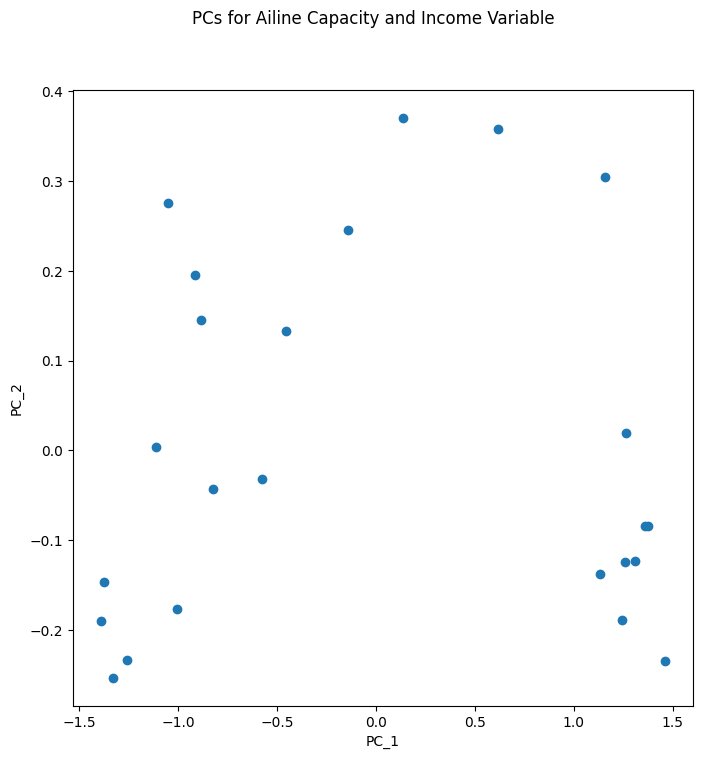

In [13]:
projected_df_selected = pca_selected.transform(df_selected)

plt.figure(figsize=(8, 8))
plt.suptitle('PCs for Ailine Capacity and Income Variable')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.scatter(projected_df_selected[:, 0], projected_df_selected[:, 1])

In [14]:
print("--- Firstly, the first component: ")
pc_1_loadings = np.asarray(pca_selected.components_[0])[
    np.argsort(np.abs(pca_selected.components_[0]))[::-1]
][0:10]
pc_1_names = np.asarray(column_names_selected)[
    np.argsort(np.abs(pca_selected.components_[0]))[::-1]
][0:10]

for i in range(0, 10):
    print("Column \"", pc_1_names[i], "\" has a loading of: ", pc_1_loadings[i])

--- Firstly, the first component: 
Column " Transport Related Expenses ($) " has a loading of:  -0.34056204431613435
Column " ASM Prodcued per Employee Equivalent " has a loading of:  -0.330021818442193
Column " International Passenger Revenue ($) " has a loading of:  -0.32820125505025655
Column " Internation ASM as % of total ASM " has a loading of:  -0.32294298011834777
Column " Domestic ASM as % of total ASM " has a loading of:  0.3229429801183467
Column " Domestic Revenue as % of total Revenue " has a loading of:  0.309706039440007
Column " International Revenue as % of total Revenue " has a loading of:  -0.3097060394400065
Column " Total Load Factor (%) " has a loading of:  -0.3001098192828339
Column " Domestic Load Factor (%) " has a loading of:  -0.29875198465305414
Column " International Revenue ($) per ASM " has a loading of:  -0.29605468919775346


In [15]:
print("--- Secondly, the second component: ")
pc_2_loadings = np.asarray(pca_selected.components_[1])[
    np.argsort(np.abs(pca_selected.components_[1]))[::-1]
][0:10]
pc_2_names = np.asarray(column_names_selected)[
    np.argsort(np.abs(pca_selected.components_[1]))[::-1]
][0:10]

for i in range(0, 10):
    print("Column \"", pc_2_names[i], "\" has a loading of: ", pc_2_loadings[i])

--- Secondly, the second component: 
Column " Transport Related Expenses ($) " has a loading of:  0.4305515325040785
Column " ASM Prodcued per Employee Equivalent " has a loading of:  0.4293704251248162
Column " Domestic ASM as % of total ASM " has a loading of:  0.3816221568074914
Column " Internation ASM as % of total ASM " has a loading of:  -0.38162215680748923
Column " Total Load Factor (%) " has a loading of:  0.3269073226725054
Column " Domestic Load Factor (%) " has a loading of:  0.2853211923460168
Column " International Revenue ($) per ASM " has a loading of:  -0.22963588743609964
Column " International Revenue as % of total Revenue " has a loading of:  -0.21529475098382286
Column " Domestic Revenue as % of total Revenue " has a loading of:  0.21529475098382256
Column " International Passenger Revenue ($) " has a loading of:  -0.07268145522845583


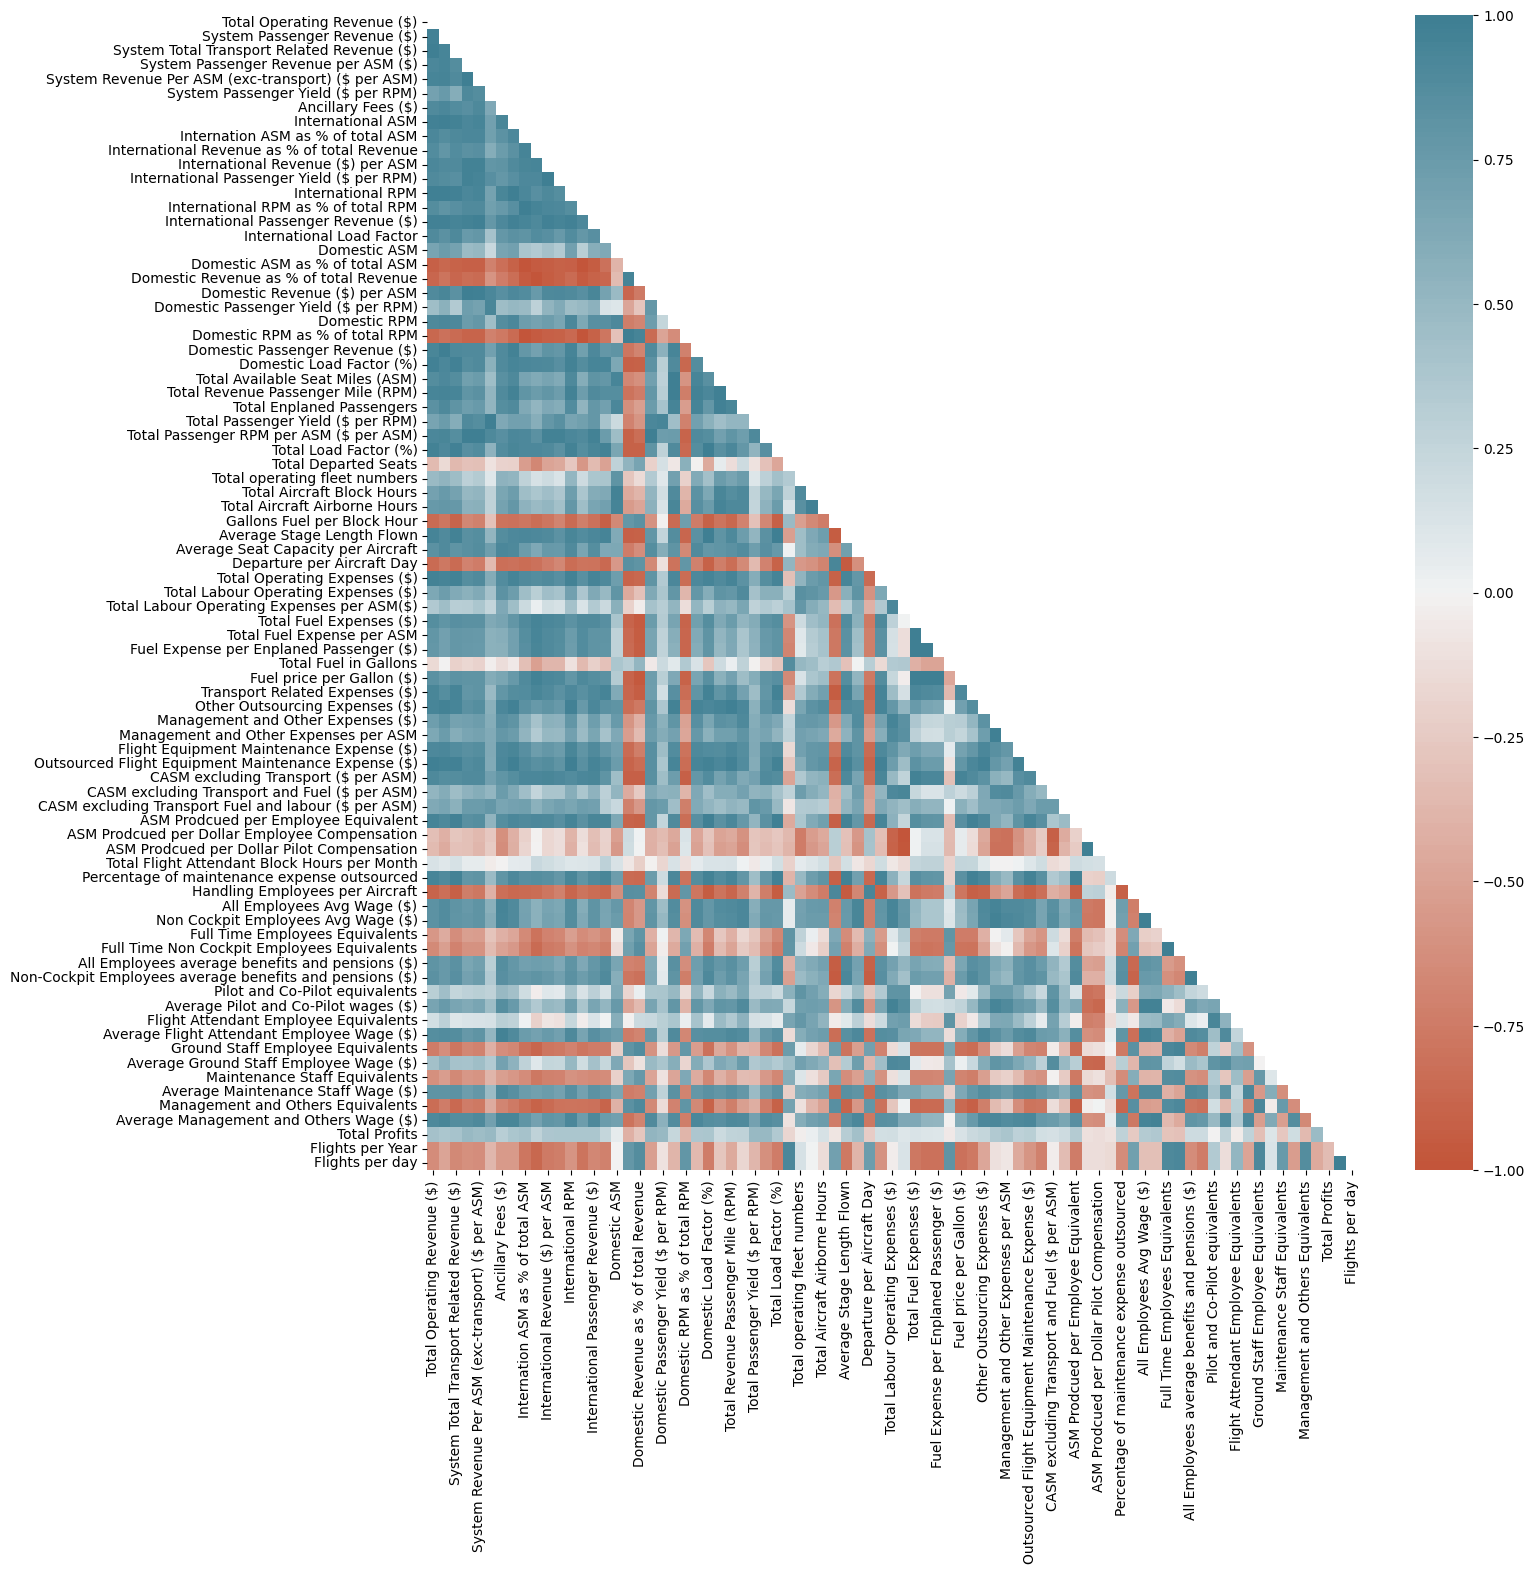

In [16]:
corr = df.corr()

plt.figure(figsize=(15, 15))
import seaborn as sns

mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(
    corr, mask=mask, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200)
)

Text(0.5, 1.0, 'Profits Correlation Bar')

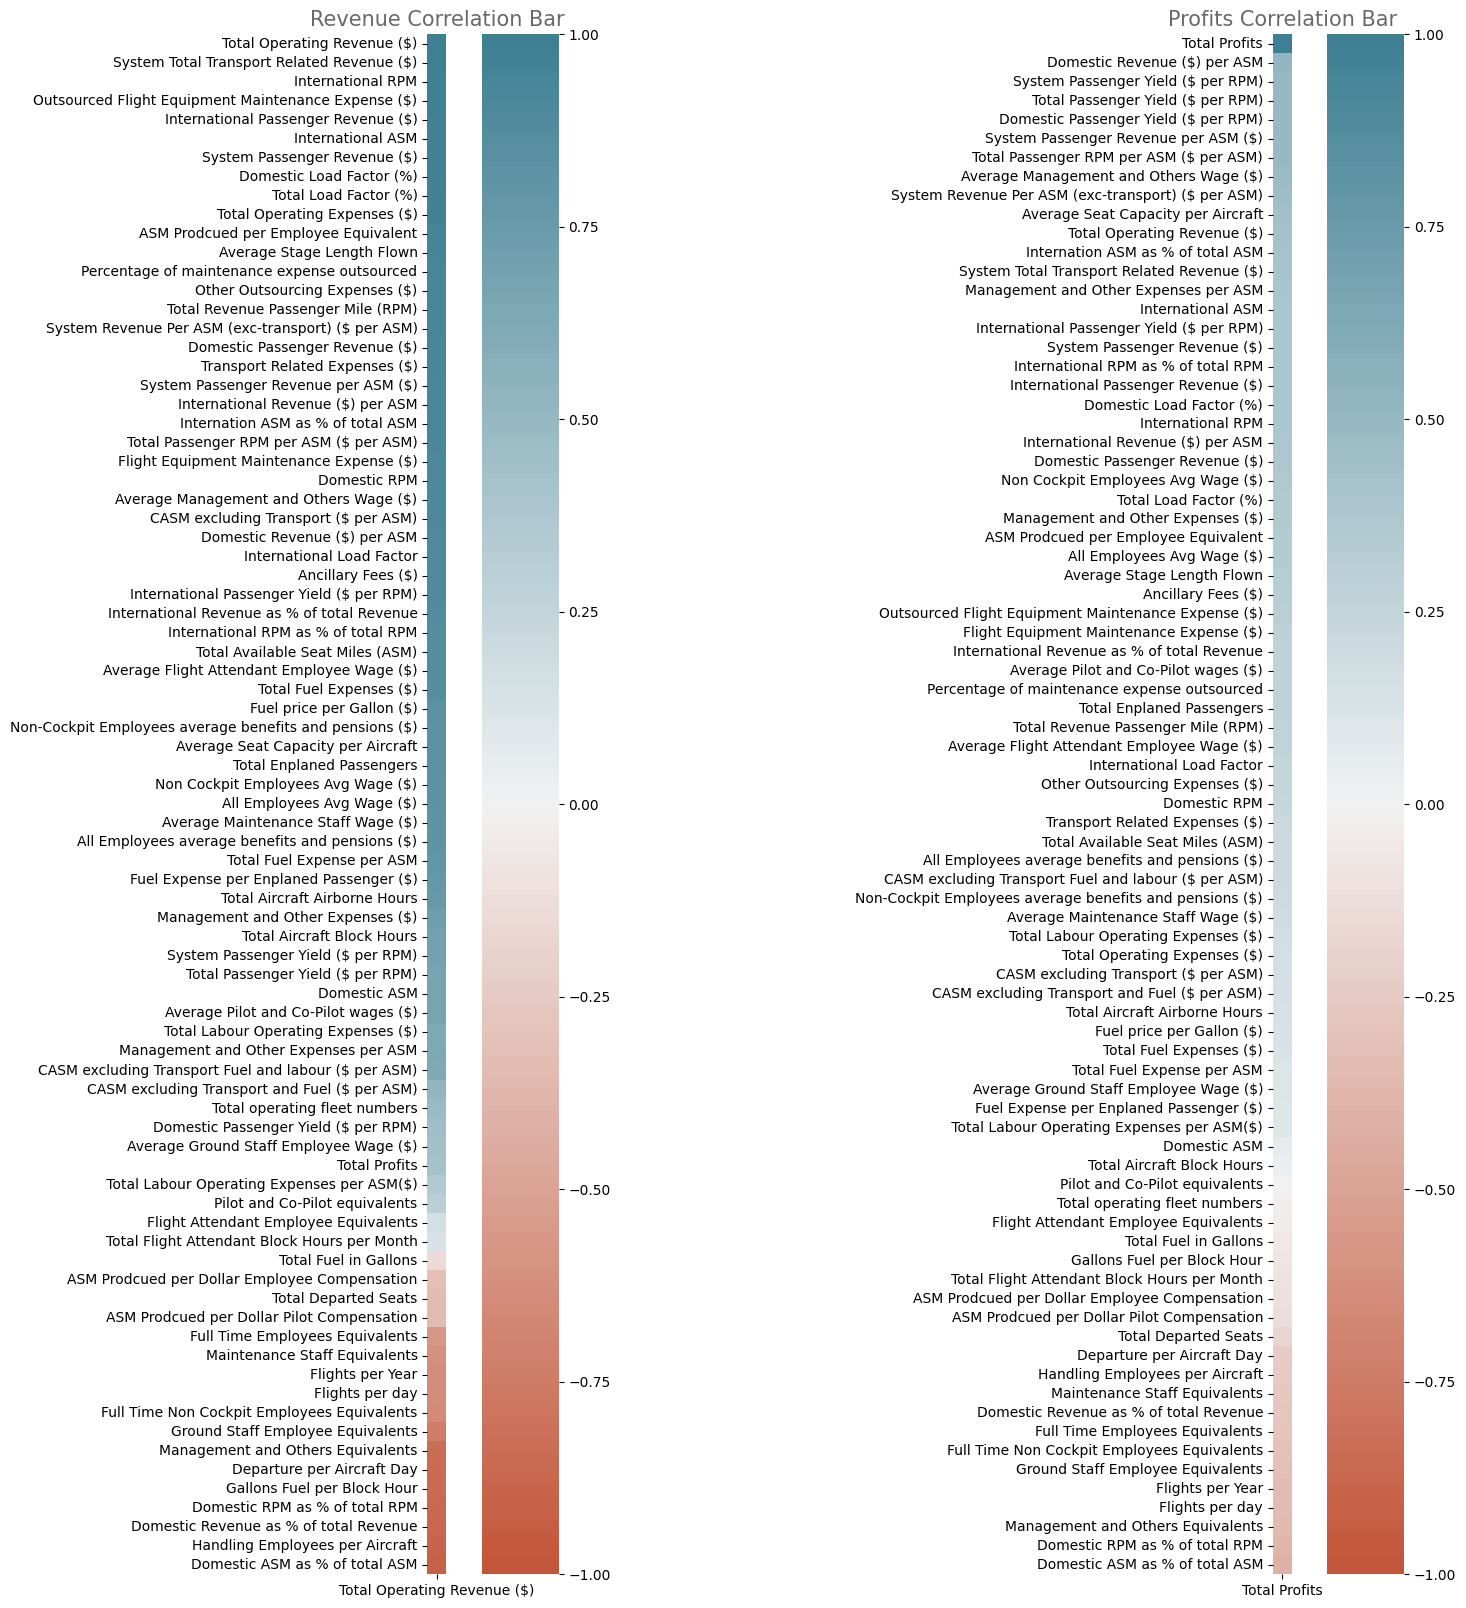

In [17]:
corr = df.corr()

# sort by the amount of correlation
revenue_corr = corr[["Total Operating Revenue ($)"]]
revenue_corr = revenue_corr.sort_values(
    by=["Total Operating Revenue ($)"], ascending=False
)

profit_corr = corr[["Total Profits"]]
profit_corr = profit_corr.sort_values(by=["Total Profits"], ascending=False)

plt.figure(figsize=(20, 20))

ax = plt.subplot(121)

import seaborn as sns

ax = sns.heatmap(
    revenue_corr,
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
)
ax.set_title("Revenue Correlation Bar", fontsize=15, color='dimgrey')

ax1 = plt.subplot(122)

ax1 = sns.heatmap(
    profit_corr,
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
)
ax1.set_title("Profits Correlation Bar", fontsize=15, color='dimgrey')

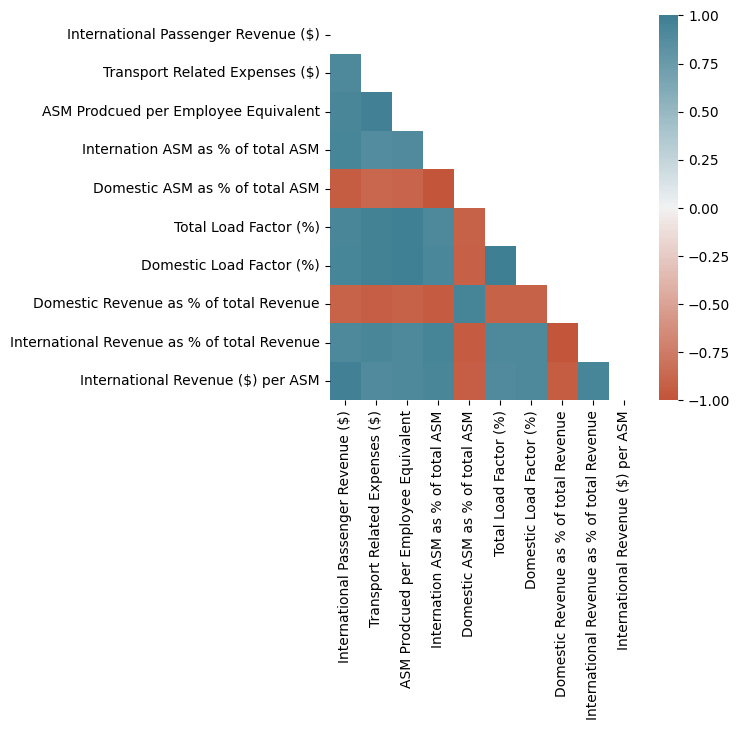

In [18]:
corr = df[column_names_selected].corr()
# print(corr.head())

plt.figure(figsize=(5, 5))
import seaborn as sns

mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(
    corr, mask=mask, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200)
)

In [19]:
df[column_names_selected].describe()

,International Passenger Revenue ($),Transport Related Expenses ($),ASM Prodcued per Employee Equivalent,Internation ASM as % of total ASM,Domestic ASM as % of total ASM,Total Load Factor (%),Domestic Load Factor (%),Domestic Revenue as % of total Revenue,International Revenue as % of total Revenue,International Revenue ($) per ASM
count,2.400000e+01,2.400000e+01,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2.604308e+10,1.284802e+10,2.361433,29.247544,70.752456,77.872490,77.812068,72.547119,27.452881,0.094755
std,8.587549e+09,7.948852e+09,0.357964,3.213268,3.213268,5.720457,6.714902,4.207309,4.207309,0.016775
min,1.583341e+10,1.388642e+09,1.876632,24.999670,66.383074,67.484937,65.913394,66.455085,21.754068,0.072889
25%,1.729038e+10,3.555991e+09,1.949455,26.153687,67.909293,72.018898,70.682892,69.195253,23.091186,0.080181
50%,2.502071e+10,1.702520e+10,2.515051,29.146951,70.853049,80.051908,80.124252,71.614644,28.385356,0.092040
75%,3.463072e+10,1.943034e+10,2.640736,32.090707,73.846313,83.321806,84.044001,76.908814,30.804747,0.108410
max,3.851251e+10,2.149814e+10,2.815807,33.616926,75.000330,84.086431,85.541313,78.245932,33.544915,0.121573


Text(0.5, 1.0, 'Total Industry Profits - 1995 to 2018 ')

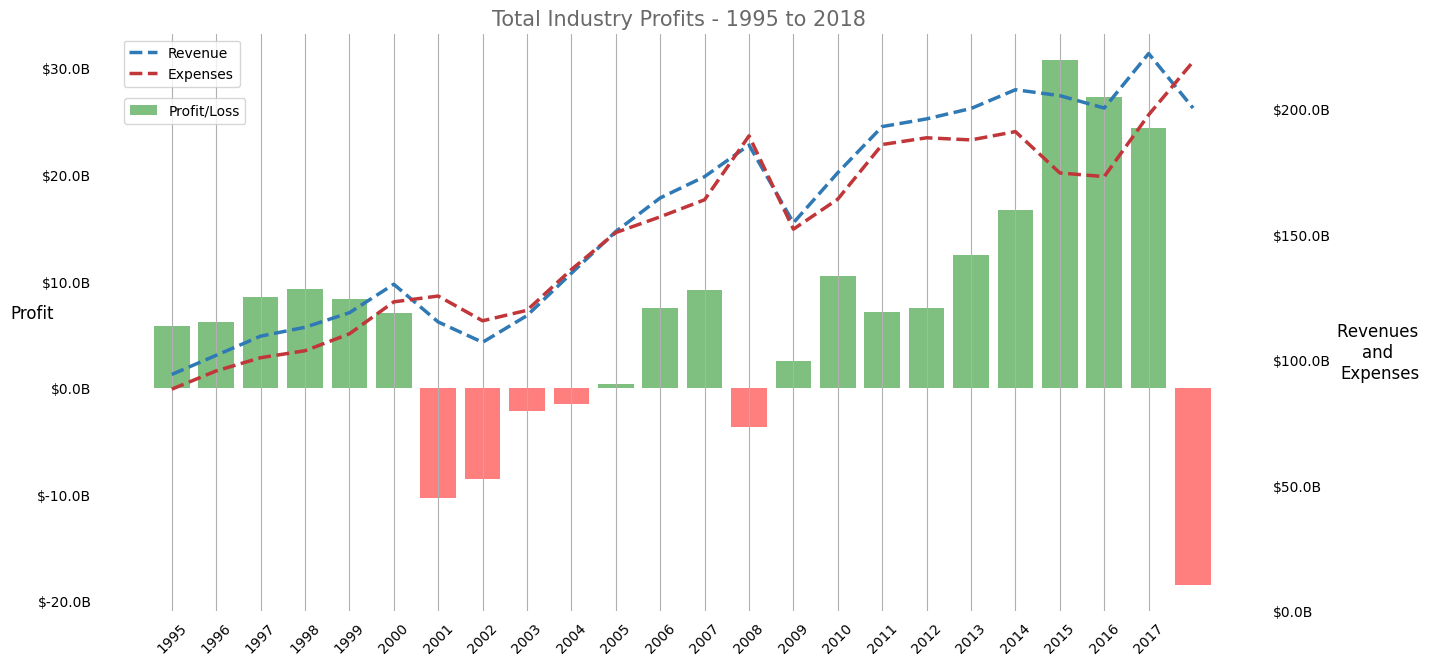

In [20]:
color = sns.color_palette("RdBu")
# sns.palplot(color)


# tick formatter
def billions(x, pos):
    return '$%1.1fB' % (x * 1e-9)


formatter = FuncFormatter(billions)

plt.figure(figsize=(15, 7.5))
ax1 = plt.subplot(111)

Year = np.arange(1995, 2019, 1)

# turn off axis spines
ax1.spines["top"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)

# share x axis
ax2 = ax1.twinx()

# turn off axis spines
ax2.spines["top"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)

# x axis tick parameters
ax1.xaxis.set_tick_params(labelsize=10, rotation=45)
ax1.xaxis.set_ticks(np.arange(1995, 2018, 1))

ax1.tick_params(
    axis="both",
    which="both",
    bottom=False,
    top=False,
    labelbottom=True,
    left=False,
    right=False,
    labelleft=True,
)
ax2.tick_params(right=False)

ax1.set_ylabel("Profit", fontsize=12, rotation=0)

ax2.set_ylabel("Revenues \nand \nExpenses", fontsize=12, rotation=0)
ax2.yaxis.set_label_coords(1.1, 0.5)

# plot data on axis
ax1.bar(
    Year,
    df["Total Profits"],
    label="Profit/Loss",
    alpha=0.5,
    color=(df["Total Profits"] > 0).map({True: 'g', False: 'r'}),
)

ax2.plot(
    df["Total Operating Revenue ($)"], label="Revenue", color=color[-1], ls="--", lw=2.5
)
ax2.plot(
    (df["Total Operating Expenses ($)"]),
    label="Expenses",
    color=color[0],
    ls="--",
    lw=2.5,
)

# format y ticks to billions
ax1.yaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)
ax2.set_ylim(0, 230e9)

# add legend
ax1.legend(bbox_to_anchor=(0.13, 0.9))
ax2.legend(bbox_to_anchor=(0.125, 1))
ax1.grid(False)
ax2.grid(False)
ax1.xaxis.grid(which="major")

# font parameters
title_font = {
    'family': 'sans-serif',
    'color': 'dimgrey',
    'weight': 'normal',
    'size': 15,
}  # title font
plt.title(
    "Total Industry Profits - 1995 to 2018 ",
    loc='center',
    fontdict=title_font,
    fontsize=15,
)

Network carrier produce 4.029328467690855 % profit
Low cost carrier produce 10.07850169228896 % profit
Other airlines produce 10.897316249359356 % profit
[9.12855287e+10 3.87855471e+10 1.58015728e+10]
ratio of Network profit vs LCC  2.3535965210092393


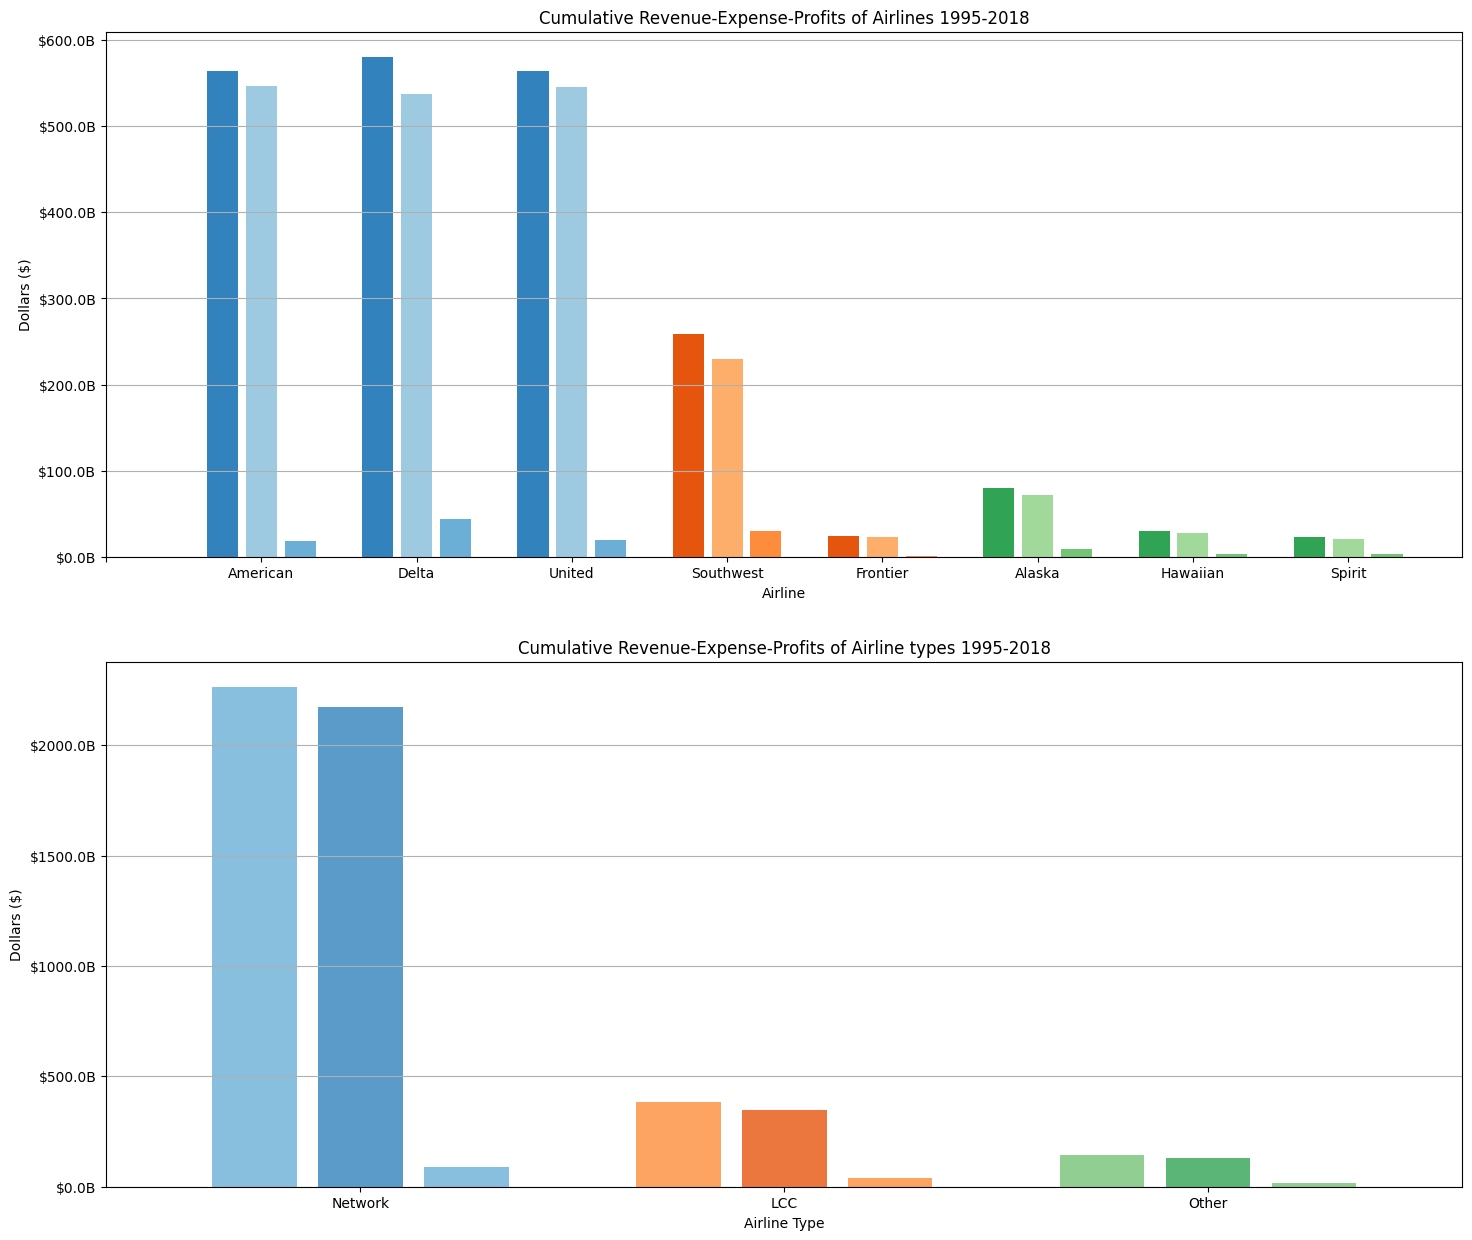

In [21]:
color = sns.color_palette("tab20c")

barwidth1 = 0.2
barwidth2 = 0.2

plt.figure(figsize=(17.5, 15))

ax1 = plt.subplot(211)

clrs1 = [color[0], color[0], color[0], color[4], color[4], color[8], color[8], color[8]]
clrs2 = [color[1], color[5], color[9]]

clrs3 = [
    color[2],
    color[2],
    color[2],
    color[6],
    color[6],
    color[10],
    color[10],
    color[10],
]
clrs4 = [color[0], color[4], color[8]]

clrs5 = [color[1], color[1], color[1], color[5], color[5], color[9], color[9], color[9]]
clrs6 = [color[1], color[5], color[9]]

rev_x1 = (np.arange(1, 9)) - 0.25
exp_x1 = np.arange(1, 9)
rev_x2 = np.arange(1, 4) - 0.25
exp_x2 = np.arange(1, 4)

prof_x1 = (np.arange(1, 9)) + 0.25
prof_x2 = np.arange(1, 4) + 0.25

ax1.bar(rev_x1, airlines_rev, color=clrs1, width=barwidth1)
ax1.bar(exp_x1, airlines_exp, color=clrs3, width=barwidth1)
ax1.bar(prof_x1, airlines_prof, color=clrs5, width=barwidth1)
ax1.yaxis.set_major_formatter(formatter)
ax1.set_ylabel("Dollars ($)")
ax1.set_xlabel("Airline")
ax1.set_xticks(np.arange(len(Labels1)))
ax1.set_xticklabels(Labels1)
ax1.set_title("Cumulative Revenue-Expense-Profits of Airlines 1995-2018")
ax1.grid(axis='y')

ax2 = plt.subplot(212)

ax2.bar(rev_x2, airline_types_rev, color=clrs2, alpha=0.8, width=barwidth2)
ax2.bar(exp_x2, airline_types_exp, color=clrs4, alpha=0.8, width=barwidth2)
ax2.bar(prof_x2, airline_types_prof, color=clrs6, alpha=0.8, width=barwidth2)
ax2.yaxis.set_major_formatter(formatter)
ax2.set_ylabel("Dollars ($)")
ax2.set_xlabel("Airline Type")
ax2.set_xticks((np.arange(4)))
ax2.set_xticklabels(Labels4)
ax2.set_xlim(0.4, 3.6)
ax2.set_title("Cumulative Revenue-Expense-Profits of Airline types 1995-2018")
ax2.grid(axis='y')

print(
    "Network carrier produce",
    (airline_types_prof / airline_types_rev)[0] * 100,
    "% profit",
)
print(
    "Low cost carrier produce",
    (airline_types_prof / airline_types_rev)[1] * 100,
    "% profit",
)
print(
    "Other airlines produce",
    (airline_types_prof / airline_types_rev)[2] * 100,
    "% profit",
)


print(airline_types_prof)
print(
    "ratio of Network profit vs LCC ", (airline_types_prof[0] / airline_types_prof[1])
)

Text(0.5, 1.0, 'Airline Expense')

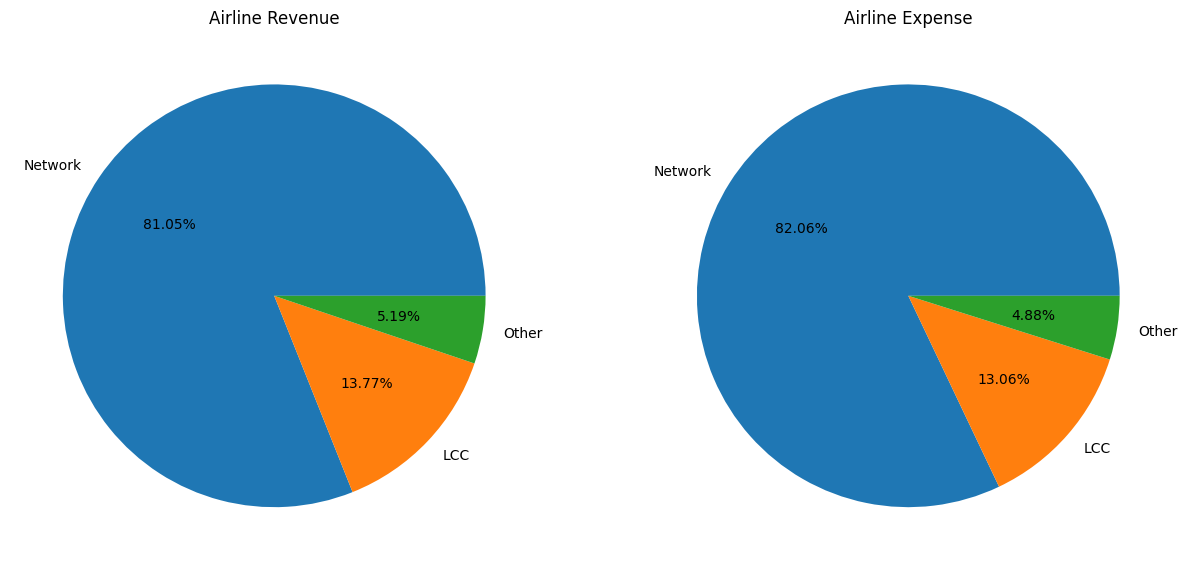

In [22]:
plt.figure(figsize=(15, 15))
Labels = ["Network", "LCC", "Other"]
ax1 = plt.subplot(121)
ax1.pie(airline_types_rev, labels=Labels, autopct='%1.2f%%')
ax1.set_title("Airline Revenue")

ax2 = plt.subplot(122)
ax2.pie(airline_types_exp, labels=Labels, autopct='%1.2f%%')
ax2.set_title("Airline Expense")

In [23]:
df['International ASM']

Year
1995    2.101305e+11
1996    2.141017e+11
1997    2.225720e+11
1998    2.297577e+11
1999    2.357971e+11
2000    2.469238e+11
2001    2.389054e+11
2002    2.191512e+11
2003    2.118331e+11
2004    2.348554e+11
2005    2.553555e+11
2006    2.686901e+11
2007    2.836178e+11
2008    2.938901e+11
2009    2.803664e+11
2010    2.897003e+11
2011    3.031454e+11
2012    3.038437e+11
2013    3.092499e+11
2014    3.197523e+11
2015    3.265487e+11
2016    3.305125e+11
2017    3.386513e+11
2018    3.463945e+11
Name: International ASM, dtype: float64

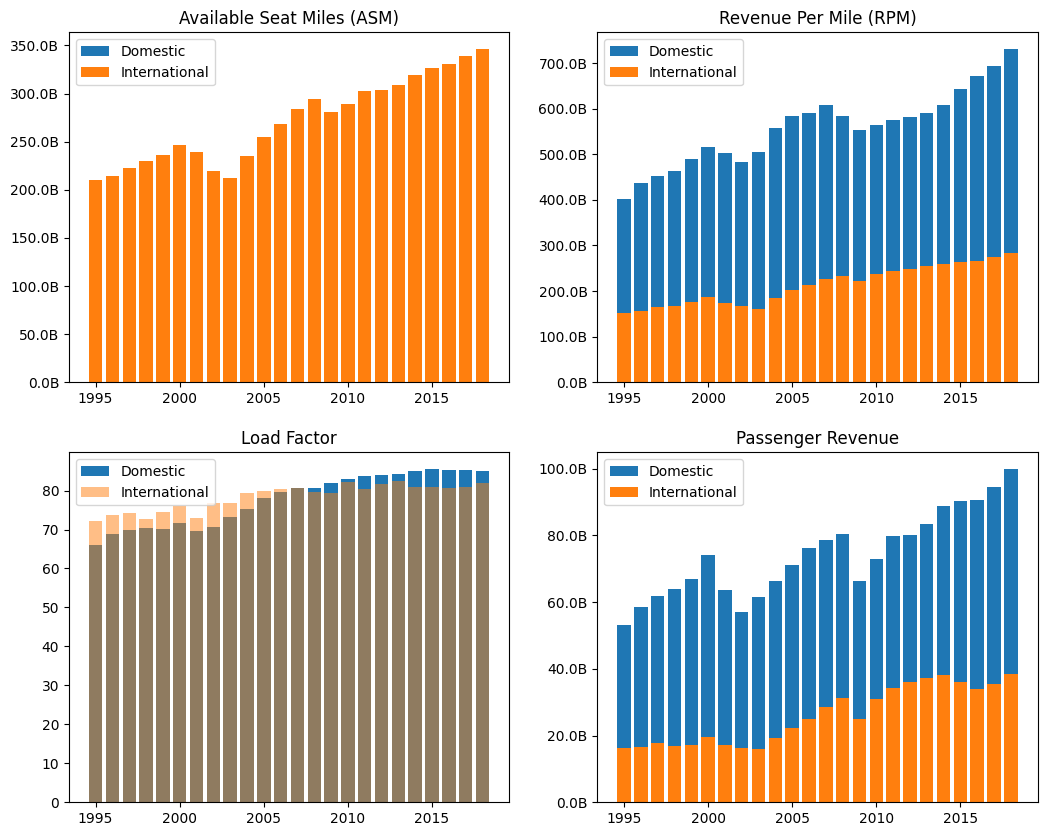

Avg Domestic ASM % of total:  70.75245609283678
Avg International ASM % of total:  29.247543907163223

Avg Domestic RPM % of total:  70.59322665257362
Avg International RPM % of total:  29.406773347426366

Avg Domestic Load factor 77.81206809170708
Avg International Load Factor 78.38270953327635

Avg Domestic Revenue % of total:  72.5471189801621
Avg International Revenue % of total:  27.452881019837907



In [24]:
# tick formatter
def billions(x, pos):
    return '%1.1fB' % (x * 1e-9)


formatter = FuncFormatter(billions)

plt.figure(figsize=(12.5, 10))
ax1 = plt.subplot(221)

p1 = plt.bar(Year, df["Domestic ASM"], label="Domestic")
p2 = plt.bar(Year, df["International ASM"], label="International")
ax1.yaxis.set_major_formatter(formatter)
plt.title("Available Seat Miles (ASM)")
plt.legend()

ax2 = plt.subplot(222)

p3 = plt.bar(Year, df["Domestic RPM"], label="Domestic")
p4 = plt.bar(Year, df["International RPM"], label="International")
ax2.yaxis.set_major_formatter(formatter)
plt.title("Revenue Per Mile (RPM)")
plt.legend()

ax3 = plt.subplot(223)

p5 = plt.bar(Year, df["Domestic Load Factor (%)"], label="Domestic")
p6 = plt.bar(Year, df["International Load Factor"], label="International", alpha=0.5)
plt.title("Load Factor")
plt.legend()

ax4 = plt.subplot(224)

p7 = plt.bar(Year, df["Domestic Passenger Revenue ($)"], label="Domestic")
p8 = plt.bar(Year, df["International Passenger Revenue ($)"], label="International")
ax4.yaxis.set_major_formatter(formatter)
plt.title("Passenger Revenue")
plt.legend()
plt.show()

print("Avg Domestic ASM % of total: ", np.mean(df["Domestic ASM as % of total ASM"]))
print(
    "Avg International ASM % of total: ",
    np.mean(df["Internation ASM as % of total ASM"]),
)
print("")

print("Avg Domestic RPM % of total: ", np.mean(df["Domestic RPM as % of total RPM"]))
print(
    "Avg International RPM % of total: ",
    np.mean(df["International RPM as % of total RPM"]),
)
print("")

print("Avg Domestic Load factor", np.mean(df["Domestic Load Factor (%)"]))
print("Avg International Load Factor", np.mean(df["International Load Factor"]))
print("")

print(
    "Avg Domestic Revenue % of total: ",
    np.mean(df["Domestic Revenue as % of total Revenue"]),
)
print(
    "Avg International Revenue % of total: ",
    np.mean(df["International Revenue as % of total Revenue"]),
)
print("")

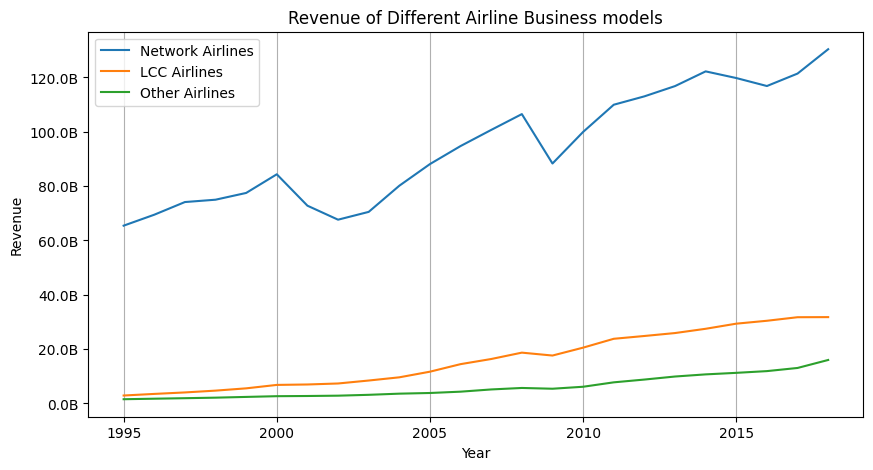

In [25]:
# airline types
network_rev = airline_rev[" --sub Network"]
LCC_rev = airline_rev[" -- sub LCC"]
Other_rev = airline_rev[" -- sub Other"]

airline_types_rev = [network_rev, LCC_rev, Other_rev]
Labels2 = ["Network Airlines", "LCC Airlines", "Other Airlines"]

plt.figure(figsize=(10, 5))
ax1 = plt.subplot(111)
ax1.plot(network_rev, label=Labels2[0])
ax1.plot(LCC_rev, label=Labels2[1])
ax1.plot(Other_rev, label=Labels2[2])
ax1.set_xlabel("Year")
ax1.set_ylabel("Revenue")
ax1.grid(axis='x')
ax1.set_title("Revenue of Different Airline Business models")
ax1.yaxis.set_major_formatter(formatter)
plt.legend()

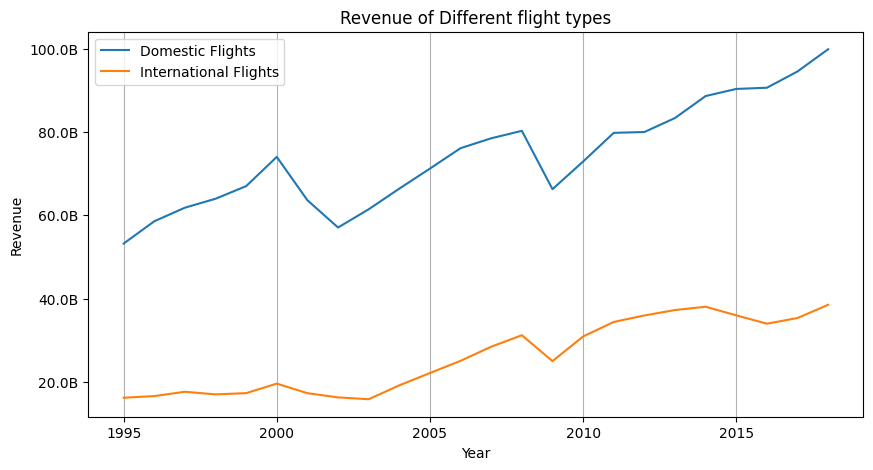

In [26]:
plt.figure(figsize=(10, 5))
ax1 = plt.subplot(111)
ax1.plot(df["Domestic Passenger Revenue ($)"], label="Domestic Flights")
ax1.plot(df["International Passenger Revenue ($)"], label="International Flights")
ax1.grid(axis='x')
ax1.set_xlabel("Year")
ax1.set_ylabel("Revenue")
ax1.set_title("Revenue of Different flight types")
ax1.yaxis.set_major_formatter(formatter)
plt.legend()

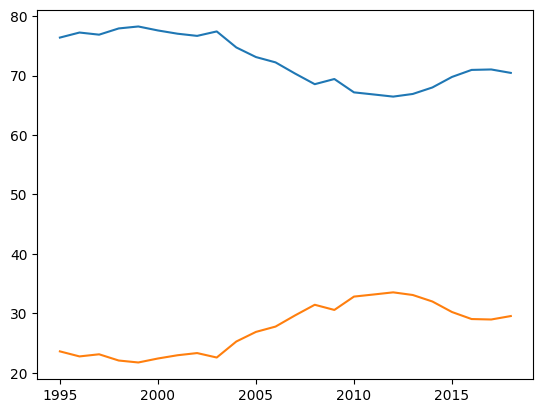

In [27]:
plt.plot(df["Domestic Revenue as % of total Revenue"])
plt.plot(df["International Revenue as % of total Revenue"])

Correlaion of number of passengers with revenue 0.8298954402831333


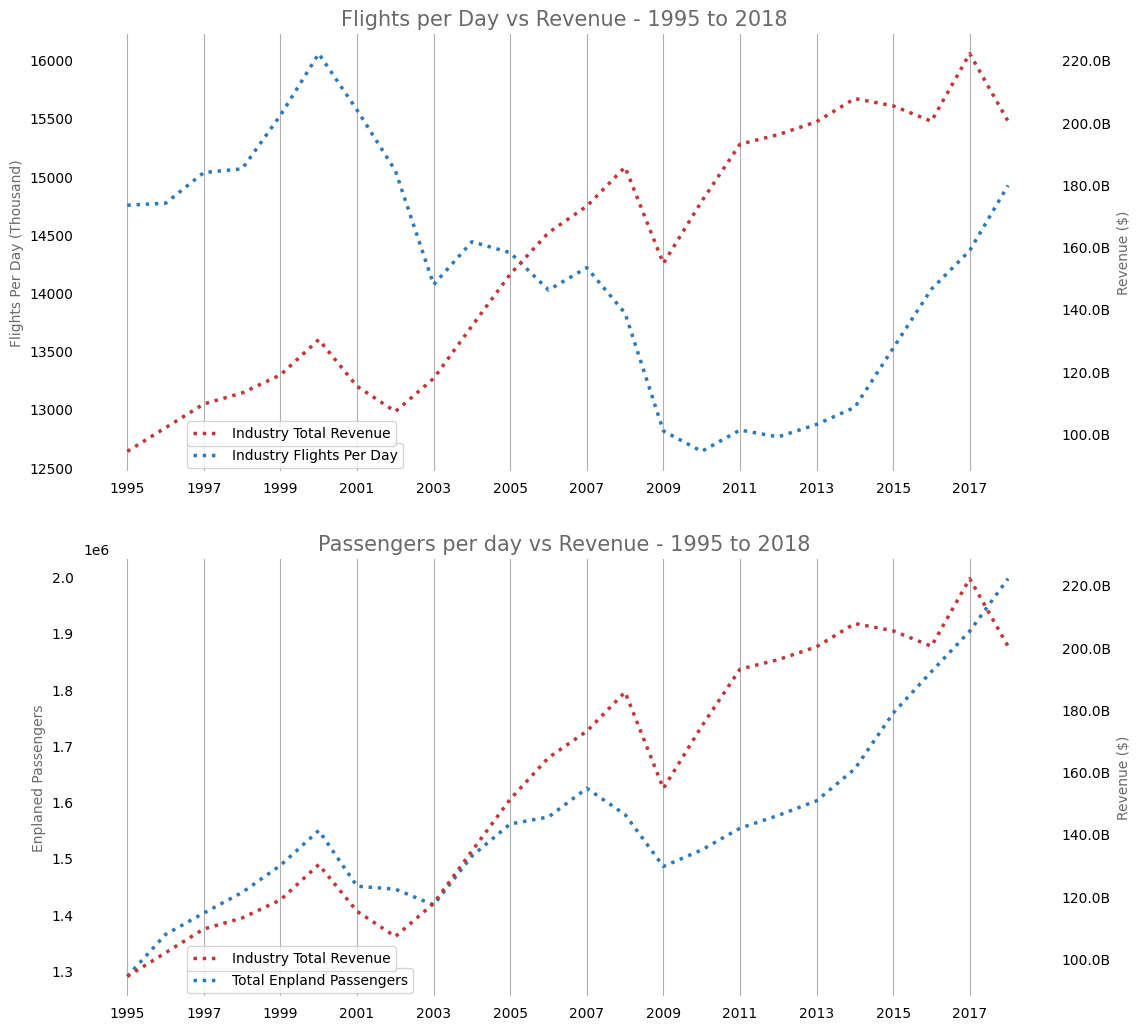

In [28]:
plt.figure(figsize=(12.5, 12.5))
color = sns.color_palette("RdBu")
ax1 = plt.subplot(211)

ax1.spines["top"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)

ax2 = ax1.twinx()

ax2.spines["top"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)

ax1.xaxis.set_tick_params(labelsize=10)
ax1.xaxis.set_ticks(np.arange(1995, 2018, 2))


ax1.tick_params(
    axis="both",
    which="both",
    bottom=False,
    top=False,
    labelbottom=True,
    left=False,
    right=False,
    labelleft=True,
)
ax2.tick_params(right=False)

ax1.set_ylabel("Flights Per Day (Thousand)", color="dimgrey")
ax2.set_ylabel("Revenue ($)", color="dimgrey")

ax1.plot(
    df["Flights per day"],
    ls=":",
    lw=2.5,
    color=color[-1],
    label="Industry Flights Per Day",
)
ax2.plot(total_revenue, color=color[0], ls=":", lw=2.5, label="Industry Total Revenue")

ax1.legend(
    bbox_to_anchor=(0.1, 0.08),
    loc=2,
)
ax2.legend(
    bbox_to_anchor=(0.1, 0.13),
    loc=2,
)
ax1.grid(False)
ax2.grid(False)
ax1.xaxis.grid(which="major")

# format y ticks to billions for axis 2

ax2.yaxis.set_major_formatter(formatter)

title_font = {
    'family': 'sans-serif',
    'color': 'dimgrey',
    'weight': 'normal',
    'size': 12,
}  # title font
plt.title(
    "Flights per Day vs Revenue - 1995 to 2018 ",
    loc='center',
    fontdict=title_font,
    fontsize=15,
)

ax3 = plt.subplot(212)

ax3.spines["top"].set_visible(False)
ax3.spines["bottom"].set_visible(False)
ax3.spines["right"].set_visible(False)
ax3.spines["left"].set_visible(False)

ax4 = ax3.twinx()

ax4.spines["top"].set_visible(False)
ax4.spines["bottom"].set_visible(False)
ax4.spines["right"].set_visible(False)
ax4.spines["left"].set_visible(False)

ax3.xaxis.set_tick_params(labelsize=10)
ax3.xaxis.set_ticks(np.arange(1995, 2018, 2))


ax3.tick_params(
    axis="both",
    which="both",
    bottom=False,
    top=False,
    labelbottom=True,
    left=False,
    right=False,
    labelleft=True,
)
ax4.tick_params(right=False)

ax3.set_ylabel("Enplaned Passengers", color="dimgrey")
ax4.set_ylabel("Revenue ($)", color="dimgrey")

ax3.plot(
    (total_traffic["Total Enplaned Passengers"] / 365),
    ls=":",
    lw=2.5,
    color=color[-1],
    label="Total Enpland Passengers",
)
ax4.plot(total_revenue, color=color[0], ls=":", lw=2.5, label="Industry Total Revenue")

ax3.legend(
    bbox_to_anchor=(0.1, 0.08),
    loc=2,
)
ax4.legend(
    bbox_to_anchor=(0.1, 0.13),
    loc=2,
)
ax3.grid(False)
ax4.grid(False)
ax3.xaxis.grid(which="major")

# format y ticks to billions for axis 2

ax4.yaxis.set_major_formatter(formatter)

title_font = {
    'family': 'sans-serif',
    'color': 'dimgrey',
    'weight': 'normal',
    'size': 12,
}  # title font
plt.title(
    "Passengers per day vs Revenue - 1995 to 2018 ",
    loc='center',
    fontdict=title_font,
    fontsize=15,
)
import scipy as sp

print(
    "Correlaion of number of passengers with revenue",
    sp.stats.pearsonr(
        df["Total Enplaned Passengers"], df["Total Operating Revenue ($)"]
    )[0],
)

([<matplotlib.patches.Wedge at 0x2204b8c9720>,
 [Text(-0.6323200328079948, 0.9000952039143951, 'Network'),
  Text(0.4351244750595214, -1.0102805012491214, 'LCC'),
  Text(1.0768059653755704, -0.22469738078488183, 'Other')],
 [Text(-0.344901836077088, 0.4909610203169427, '69.5%'),
  Text(0.2373406227597389, -0.5510620915904298, '24.0%'),
  Text(0.5873487083866746, -0.12256220770084462, '6.5%')])

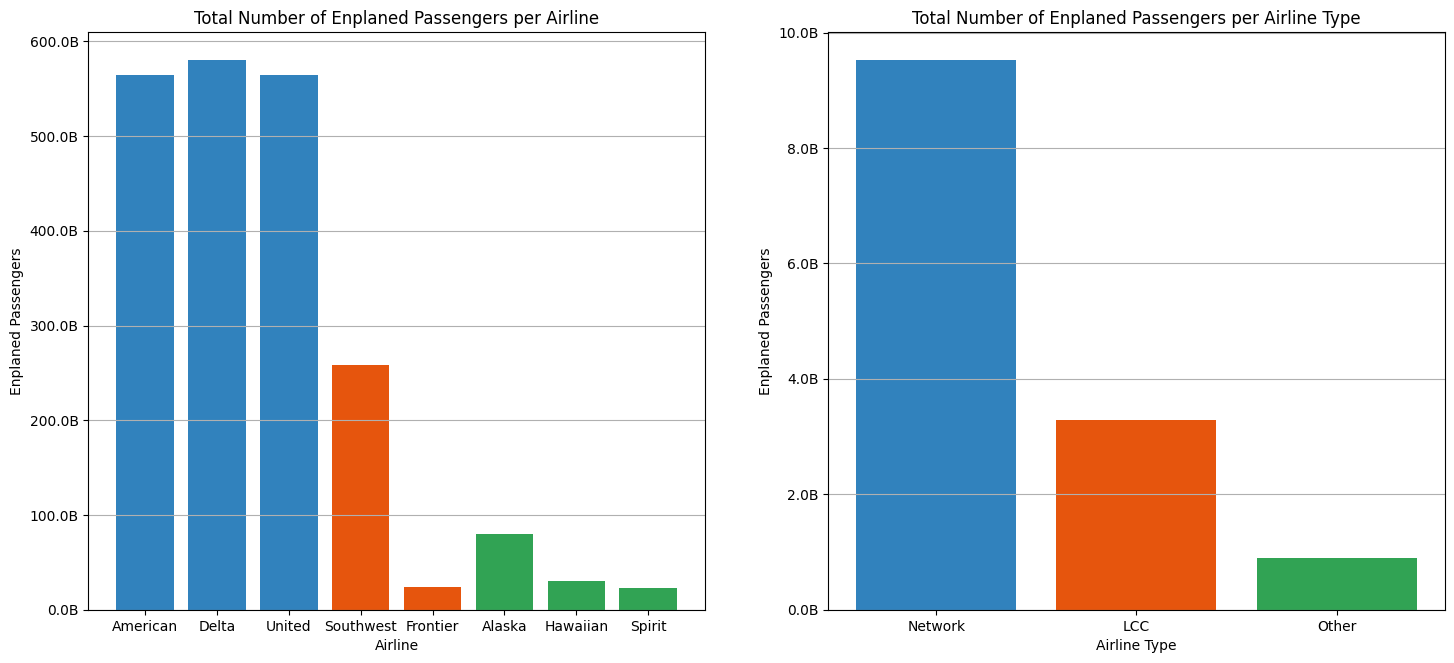

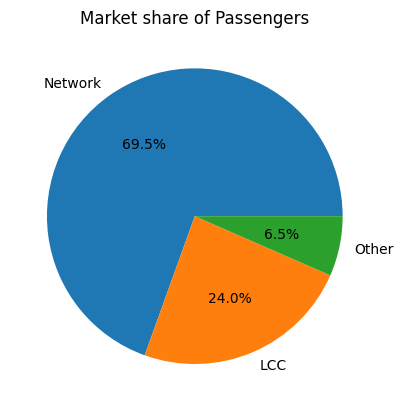

In [29]:
# tick formatter
def billions(x, pos):
    return '%1.1fB' % (x * 1e-9)


formatter = FuncFormatter(billions)

plt.figure(figsize=(17.5, 7.5))
ax1 = plt.subplot(121)
ax1.bar(pass_labels, airlines_pass, color=clrs1)
ax1.set_title("Total Number of Enplaned Passengers per Airline")
ax1.set_ylabel("Enplaned Passengers")
ax1.set_xlabel("Airline")
ax1.yaxis.set_major_formatter(formatter)
ax1.grid(axis='y')

ax2 = plt.subplot(122)
ax2.bar(pass_type_labels, airline_types_pass, color=clrs4)
ax2.set_title("Total Number of Enplaned Passengers per Airline Type")
ax2.set_ylabel("Enplaned Passengers")
ax2.set_xlabel("Airline Type")
ax2.yaxis.set_major_formatter(formatter)
ax2.grid(axis='y')

plt.figure()
ax3 = plt.subplot(111)
ax3.set_title("Market share of Passengers")
ax3.pie(airline_types_pass, labels=Labels, autopct='%1.1f%%')

In [30]:
color = sns.color_palette("Paired")

ASM recovered from 2008 by  0.107715460585741
RPM recovered from 2008 by  0.10162467560507948

No. of Passengers recovered from 2008 by 16.454456986532094 %
No. of Passengers recovered from 2008 by 34.42891981723883 %


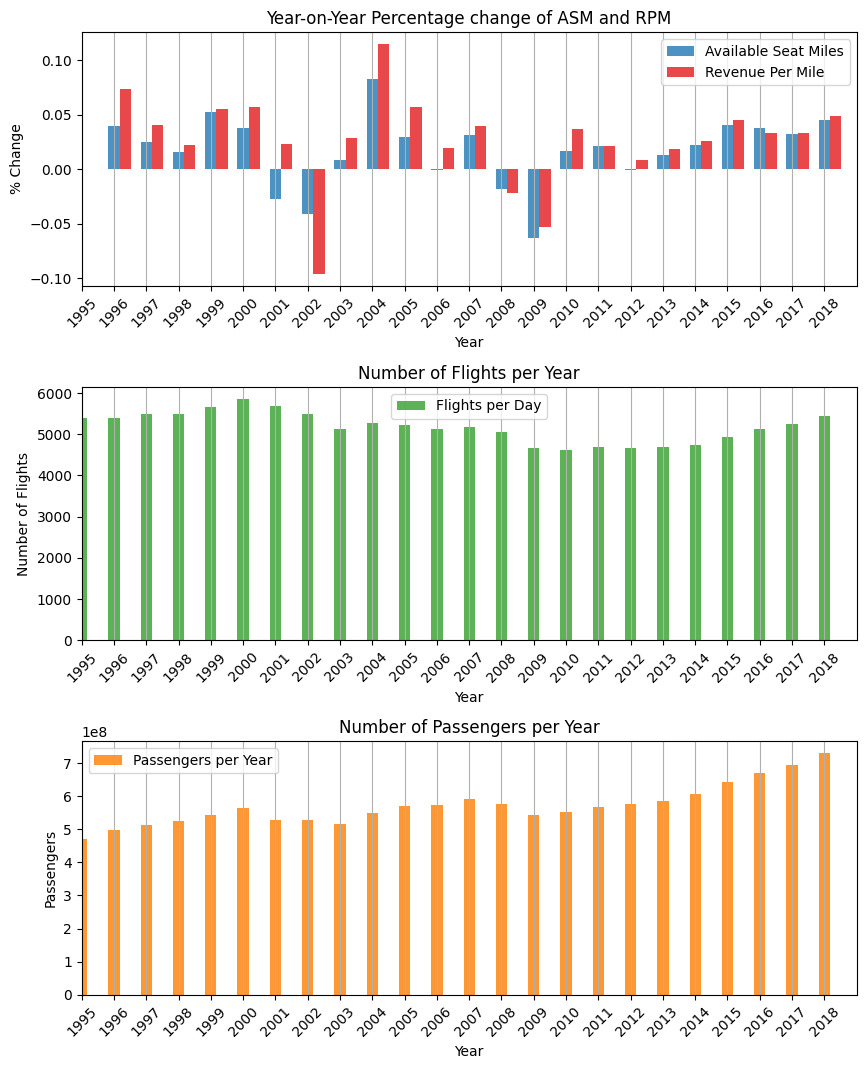

In [31]:
# Relative Change in ASM and RPM over the years is very small
# Calculate the percentage change and plot that instead of actual values
Year = np.arange(1995, 2019, 1)

# Percentage change ASM
df["% ASM Change"] = total_asm.pct_change()
df["% RPM Change"] = total_rpm.pct_change()

# fill first gap with 0
df["% RPM Change"] = df["% RPM Change"].fillna(0)
df["% ASM Change"] = df["% ASM Change"].fillna(0)

# define bar height variables
ASM = df["% ASM Change"].fillna(0)
RPM = df["% RPM Change"].fillna(0)

# set bar width
barwidth = 0.35

# create figure
plt.figure(figsize=(10, 12.5))
ax1 = plt.subplot(311)
plt.subplots_adjust(hspace=0.4)

# x position of bars (asm at x and rpm at x + barwidth)
asm_x = Year
rpm_x = [x + barwidth for x in asm_x]

# plot bars
ax1.bar(
    asm_x, ASM, width=barwidth, color=color[1], alpha=0.8, label="Available Seat Miles"
)
ax1.bar(rpm_x, RPM, width=barwidth, color=color[5], alpha=0.8, label="Revenue Per Mile")


# configure axis, ticks and legend
ax1.set_xlabel("Year")
ax1.set_ylabel("% Change")
ax1.set_title("Year-on-Year Percentage change of ASM and RPM")
# ax1.set_xticks(rotation=45)
ax1.set_xlim(1997, 2019)
plt.xticks(rotation=45)
ax1.set_xticks(Year)
ax1.grid(axis='x')
ax1.legend()

ax2 = plt.subplot(312)

flights = df["Flights per Year"]


flights_x = Year

plt.bar(
    flights_x,
    flights,
    width=barwidth,
    color=color[3],
    alpha=0.8,
    label="Flights per Day",
)

# configure axis, ticks and legend
plt.xlabel("Year")
plt.ylabel("Number of Flights")
plt.title("Number of Flights per Year")
plt.xticks(rotation=45)
plt.xlim(1995, 2019)
ax2.xaxis.set_ticks(Year)
plt.grid(axis='x')
plt.legend()

ax3 = plt.subplot(313)

passengers = df["Total Enplaned Passengers"]

pass_x = Year

plt.bar(
    pass_x,
    passengers,
    width=barwidth,
    color=color[7],
    alpha=0.8,
    label="Passengers per Year",
)

# configure axis, ticks and legend
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.title("Number of Passengers per Year")
plt.xticks(rotation=45)
plt.xlim(1995, 2019)
ax3.xaxis.set_ticks(Year)
plt.grid(axis='x')
plt.legend()

print("ASM recovered from 2008 by ", (ASM[2018] - ASM[2009]))
print("RPM recovered from 2008 by ", (RPM[2018] - RPM[2009]))
print("")
print(
    "No. of Passengers recovered from 2008 by",
    ((flights[2018] - flights[2009]) / flights[2009]) * 100,
    "%",
)
print(
    "No. of Passengers recovered from 2008 by",
    ((passengers[2018] - passengers[2009]) / passengers[2009]) * 100,
    "%",
)

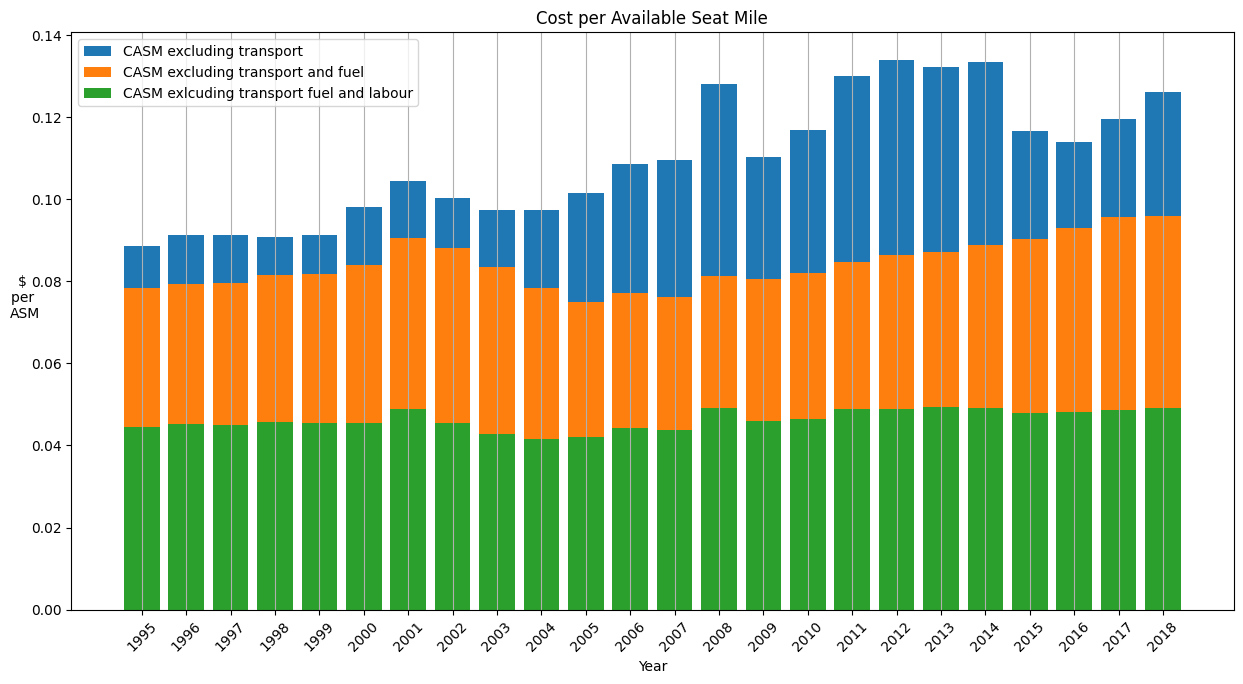

overall increase of CASM with labour,excluding transport and fuel is  0.01770683731309612
overall increase of CASM with labour and fuel excluding transport is  0.03761917555709278


In [32]:
plt.figure(figsize=(15, 7.5))

casm1 = df["CASM excluding Transport ($ per ASM)"]
casm2 = df["CASM excluding Transport and Fuel ($ per ASM)"]
casm3 = df["CASM excluding Transport Fuel and labour ($ per ASM)"]

p1 = plt.bar(Year, casm1, label="CASM excluding transport")
p2 = plt.bar(Year, casm2, label="CASM excluding transport and fuel")
p3 = plt.bar(Year, casm3, label="CASM exlcuding transport fuel and labour")

plt.title("Cost per Available Seat Mile")
plt.ylabel("$ \nper \nASM", rotation=0)
plt.xlabel("Year")
plt.xticks(Year, rotation=45)
plt.grid(axis='x')
plt.legend(loc='upper left')

plt.show()
print(
    "overall increase of CASM with labour,excluding transport and fuel is ",
    casm2[2018] - casm2[1995],
)
print(
    "overall increase of CASM with labour and fuel excluding transport is ",
    casm1[2018] - casm1[1995],
)

33331773000.0
21498142430.0


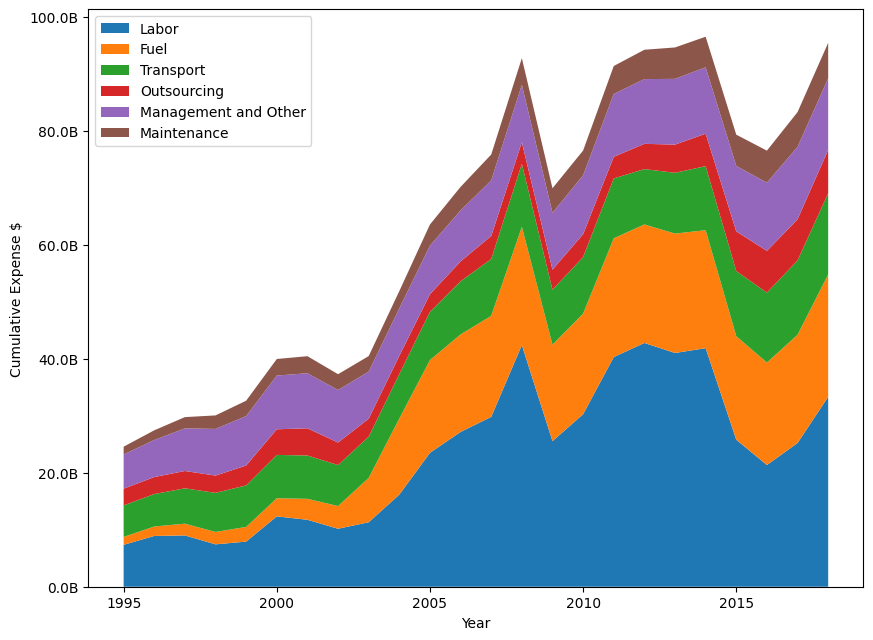

In [33]:
# stack plot of expenses table.
labels = [
    "Labor",
    "Fuel",
    "Transport",
    "Outsourcing",
    "Management and Other",
    "Maintenance",
    "Outsourced Maintenance",
]

plt.figure(figsize=(10, 7.5))
ax = plt.subplot(111)

ax.stackplot(
    Year,
    expenses["Total Fuel Expenses ($)"],
    expenses["Transport Related Expenses ($)"],
    expenses["Other Outsourcing Expenses ($)"],
    expenses["Management and Other Expenses ($)"],
    expenses["Flight Equipment Maintenance Expense ($)"],
    expenses["Outsourced Flight Equipment Maintenance Expense ($)"],
    labels=labels,
)


ax.yaxis.set_major_formatter(formatter)
ax.set_ylabel("Cumulative Expense $")
ax.set_xlabel("Year")

plt.legend(loc="upper left")
print(expenses["Total Fuel Expenses ($)"][2018])
print(expenses["Transport Related Expenses ($)"][2018])

(-1.1493135475775216,
 1.1023482641640772,
 -1.1044140741918982,
 1.1926986888665825)

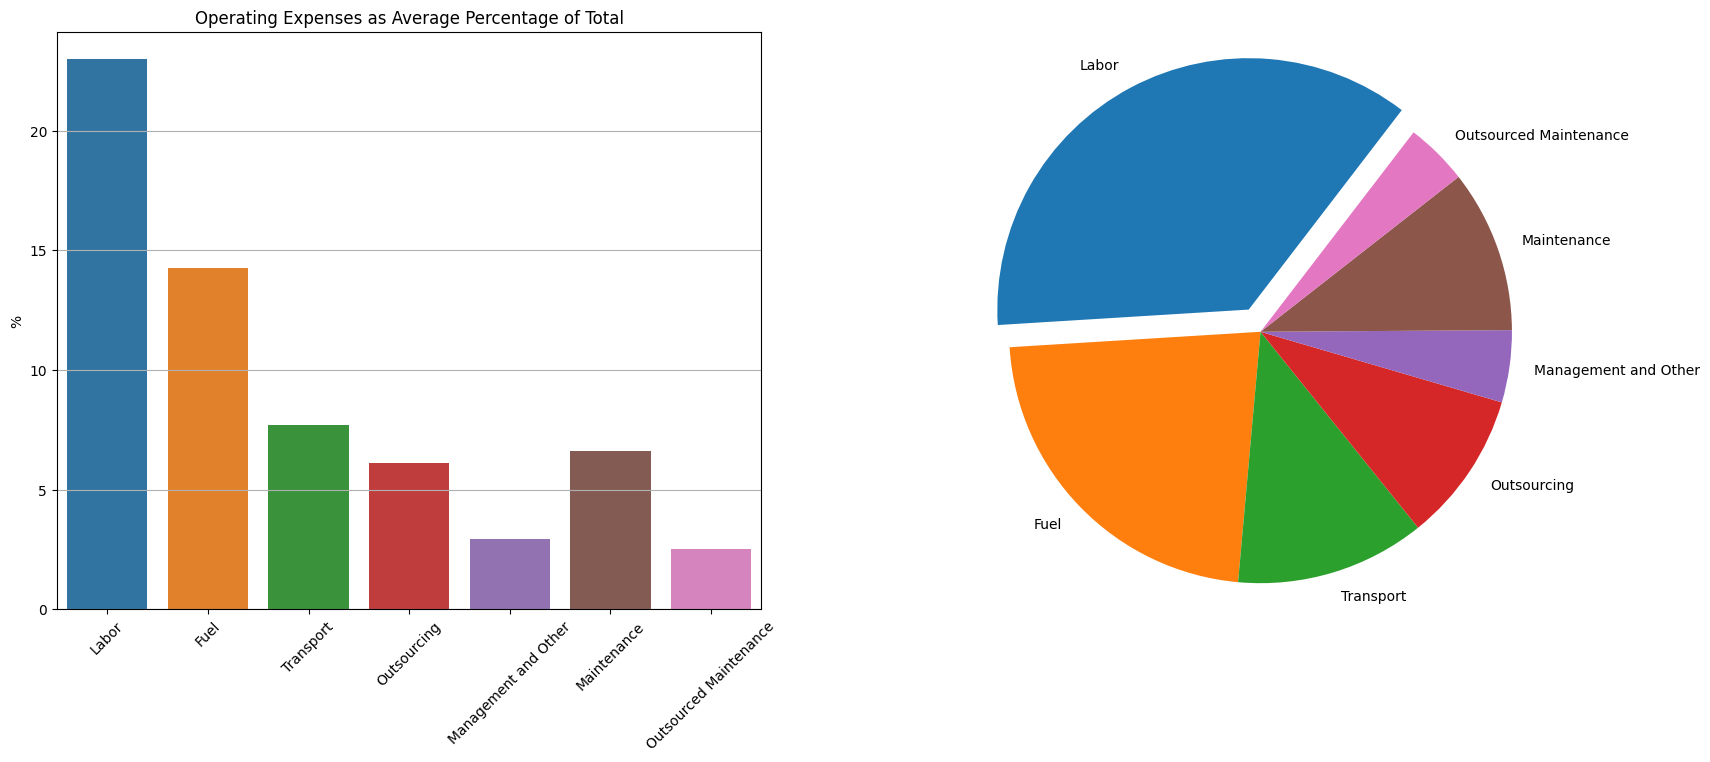

In [34]:
# take average percentage of total expenses and plot against each feature selected
plt.figure(figsize=(20, 7.5))

ax1 = plt.subplot(121)

total = expenses["Total Operating Expenses ($)"]

labor_perc = np.mean((expenses["Total Labour Operating Expenses ($)"] / total) * 100)
fuel_perc = np.mean((expenses["Total Fuel Expenses ($)"] / total) * 100)
trans_perc = np.mean((expenses["Transport Related Expenses ($)"] / total) * 100)
outsource_perc = np.mean((expenses["Other Outsourcing Expenses ($)"] / total) * 100)
mgmnt_perc = np.mean((expenses["Management and Other Expenses ($)"] / total) * 100)
maint_perc = np.mean(
    (expenses["Flight Equipment Maintenance Expense ($)"] / total) * 100
)
outs_maint_perc = np.mean(
    (expenses["Outsourced Flight Equipment Maintenance Expense ($)"] / total) * 100
)

expense_percentages = [
    labor_perc,
    fuel_perc,
    trans_perc,
    outsource_perc,
    mgmnt_perc,
    maint_perc,
    outs_maint_perc,
]

ax1 = sns.barplot(x=labels, y=expense_percentages)

plt.grid(axis='y')
plt.title("Operating Expenses as Average Percentage of Total")
plt.ylabel("%")
plt.xticks(rotation=45)

ax2 = plt.subplot(122)

explode = (0.1, 0, 0, 0, 0, 0, 0)  # explode 1st slice

plt.pie(expense_percentages, explode=explode, labels=labels, startangle=52.5)

plt.axis('equal')

(-1.1493135475775216,
 1.1023482641640772,
 -1.1044140741918982,
 1.1926986888665825)

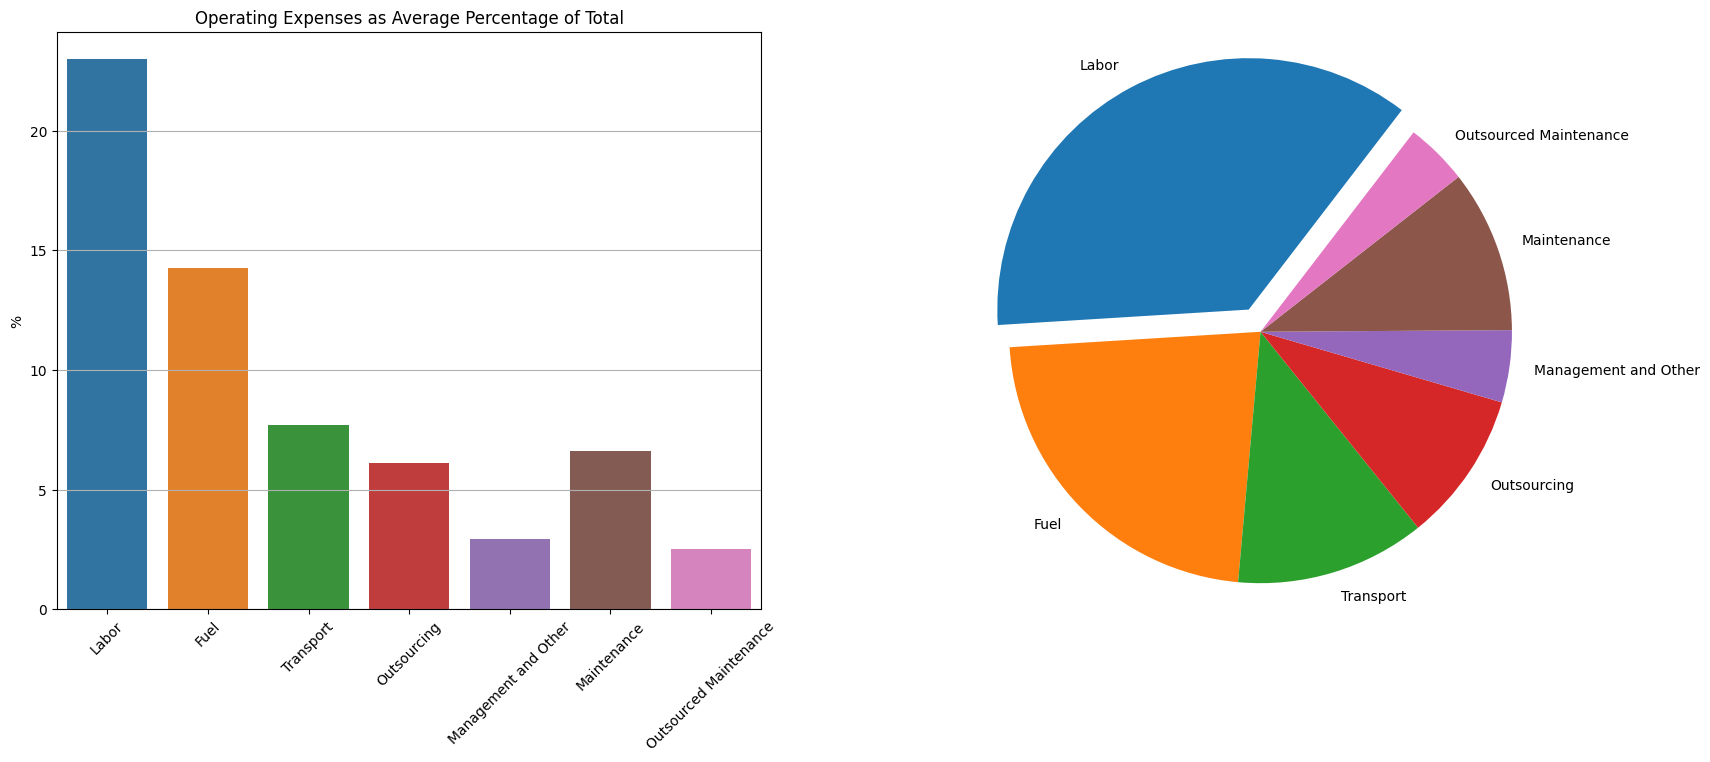

In [35]:
# take average percentage of total expenses and plot against each feature selected
plt.figure(figsize=(20, 7.5))

ax1 = plt.subplot(121)

total = expenses["Total Operating Expenses ($)"]

labor_perc = np.mean((expenses["Total Labour Operating Expenses ($)"] / total) * 100)
fuel_perc = np.mean((expenses["Total Fuel Expenses ($)"] / total) * 100)
trans_perc = np.mean((expenses["Transport Related Expenses ($)"] / total) * 100)
outsource_perc = np.mean((expenses["Other Outsourcing Expenses ($)"] / total) * 100)
mgmnt_perc = np.mean((expenses["Management and Other Expenses ($)"] / total) * 100)
maint_perc = np.mean(
    (expenses["Flight Equipment Maintenance Expense ($)"] / total) * 100
)
outs_maint_perc = np.mean(
    (expenses["Outsourced Flight Equipment Maintenance Expense ($)"] / total) * 100
)

expense_percentages = [
    labor_perc,
    fuel_perc,
    trans_perc,
    outsource_perc,
    mgmnt_perc,
    maint_perc,
    outs_maint_perc,
]

ax1 = sns.barplot(x=labels, y=expense_percentages)

plt.grid(axis='y')
plt.title("Operating Expenses as Average Percentage of Total")
plt.ylabel("%")
plt.xticks(rotation=45)

ax2 = plt.subplot(122)

explode = (0.1, 0, 0, 0, 0, 0, 0)  # explode 1st slice

plt.pie(expense_percentages, explode=explode, labels=labels, startangle=52.5)

plt.axis('equal')

In [36]:
# sankey diagram 1st layer connections
print("All expenses fraction of revenue:")

print(
    (df["Total Labour Operating Expenses ($)"]).sum()
    / (df["Total Operating Revenue ($)"].sum())
)
print((df["Total Fuel Expenses ($)"]).sum() / (df["Total Operating Revenue ($)"].sum()))
print(
    (df["Transport Related Expenses ($)"]).sum()
    / (df["Total Operating Revenue ($)"].sum())
)
print(
    (df["Other Outsourcing Expenses ($)"]).sum()
    / (df["Total Operating Revenue ($)"].sum())
)
print(
    (df["Management and Other Expenses ($)"]).sum()
    / (df["Total Operating Revenue ($)"].sum())
)
print(
    (df["Flight Equipment Maintenance Expense ($)"]).sum()
    / (df["Total Operating Revenue ($)"].sum())
)
print(
    (df["Outsourced Flight Equipment Maintenance Expense ($)"]).sum()
    / (df["Total Operating Revenue ($)"].sum())
)
print((df["Total Profits"]).sum() / (df["Total Operating Revenue ($)"].sum()))


avg_emp_exp = np.mean(
    df["Total Labour Operating Expenses ($)"] / df["Full Time Employees Equivalents"]
)

# sankey 2nd layer - labour expenses to compensation

print("Compensation fraction of revenue:")
print(
    (df["Non Cockpit Employees Avg Wage ($)"] / df["Total Operating Revenue ($)"]).sum()
)
print(
    (
        df["All Employees average benefits and pensions ($)"]
        / df["Total Operating Revenue ($)"]
    ).sum()
)
print(
    (
        df["Average Pilot and Co-Pilot wages ($)"] / df["Total Operating Revenue ($)"]
    ).sum()
)
print(
    (
        df["Average Flight Attendant Employee Wage ($)"]
        / df["Total Operating Revenue ($)"]
    ).sum()
)
print(
    (
        df["Average Ground Staff Employee Wage ($)"] / df["Total Operating Revenue ($)"]
    ).sum()
)
print(
    (df["Average Maintenance Staff Wage ($)"] / df["Total Operating Revenue ($)"]).sum()
)
print(
    (
        df["Average Management and Others Wage ($)"] / df["Total Operating Revenue ($)"]
    ).sum()
)

All expenses fraction of revenue:
0.21342525222233955
0.14657654986779392
0.08174145917688909
0.05848542118351285
0.02783913366573641
0.06196952027358395
0.02509547573764702
0.041718579260328716
Compensation fraction of revenue:
6.122752128262337e-06
2.637208409141488e-06
2.364866882147188e-05
6.671064619080196e-06
6.580704937256467e-06
1.0152527404755336e-05
1.173264519961953e-05


Pearsons Correlation between No. employees and Total Profits is:  -0.2924976366430855
Pearsons Correlation between No. employees and Total system Revenue is:  -0.575877386261329
Pearsons Correlation between No. employees and Total system Expenses is:  0.5404828946370223


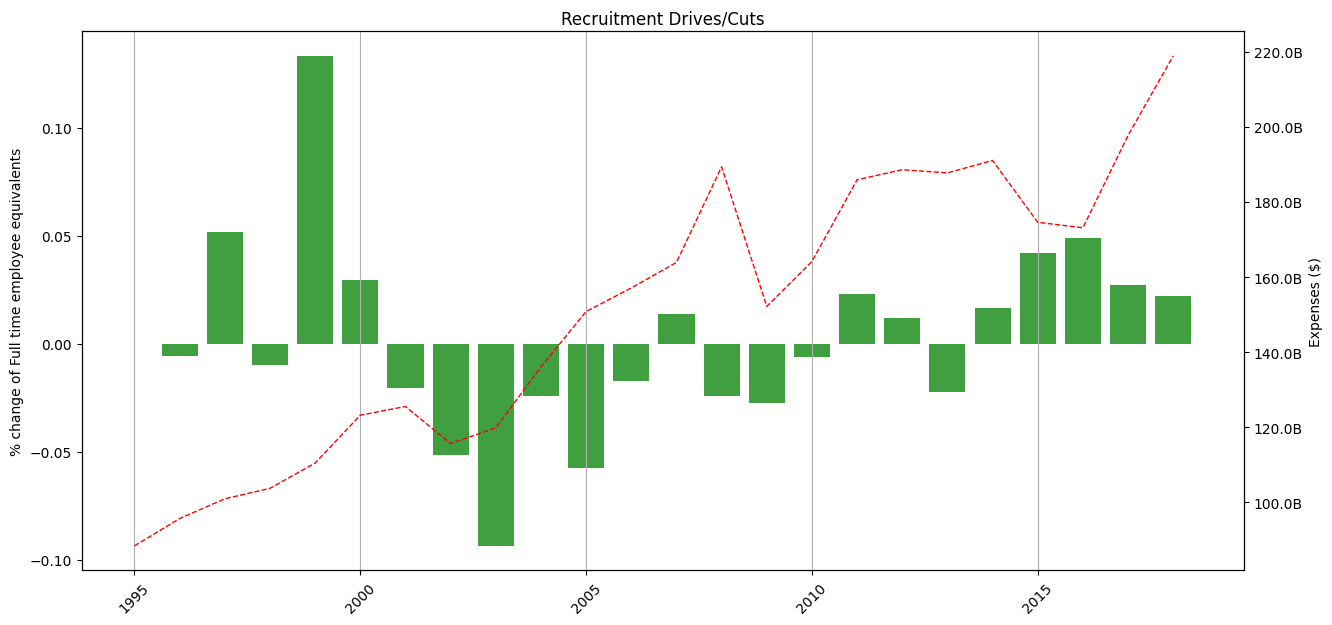

In [37]:
employee_change = compensation["Full Time Employees Equivalents"].pct_change()
Year = np.arange(1995, 2019, 1)

fig, ax = plt.subplots(figsize=(15, 7))


ax.bar(Year, employee_change, alpha=0.75, color='g')
plt.title("Recruitment Drives/Cuts")
ax.set_ylabel("% change of Full time employee equivalents")
plt.xticks(rotation=45)


ax2 = ax.twinx()

ax2.plot(df["Total Operating Expenses ($)"], lw=1, ls='--', color='r')
ax2.yaxis.set_major_formatter(formatter)
ax2.set_ylabel("Expenses ($)")
ax.grid(axis='x')

import scipy as sp

print(
    "Pearsons Correlation between No. employees and Total Profits is: ",
    sp.stats.pearsonr(
        compensation["Full Time Employees Equivalents"], df["Total Profits"]
    )[0],
)

print(
    "Pearsons Correlation between No. employees and Total system Revenue is: ",
    sp.stats.pearsonr(
        compensation["Full Time Employees Equivalents"],
        df["Total Operating Revenue ($)"],
    )[0],
)

print(
    "Pearsons Correlation between No. employees and Total system Expenses is: ",
    sp.stats.pearsonr(
        compensation["Full Time Employees Equivalents"],
        -1 * df["Total Operating Expenses ($)"],
    )[0],
)

### Statistics

In [38]:
def get_stationarity(timeseries):
    # rolling statistics
    rolling_mean = timeseries.rolling(window=5).mean()
    rolling_std = timeseries.rolling(window=5).std()

    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Dickey–Fuller test:
    result = adfuller(timeseries)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

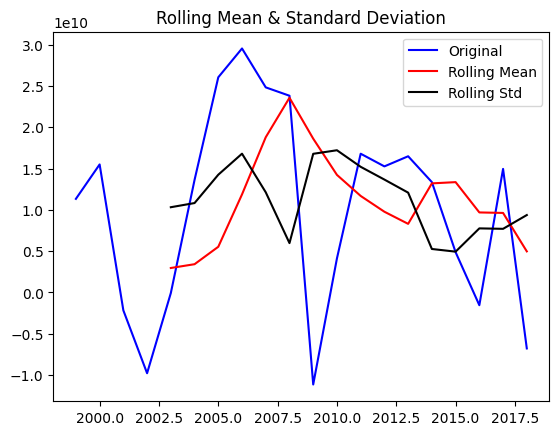

ADF Statistic: -2.5406273430542403
p-value: 0.10589950883191646
Critical Values:
	1%: -3.8326031418574136
	5%: -3.0312271701414204
	10%: -2.655519584487535


In [39]:
rev = df['Total Operating Revenue ($)']
rolling_mean = rev.rolling(window=5).mean()
rev_minus_mean = rev - rolling_mean
rev_minus_mean.dropna(inplace=True)

get_stationarity(rev_minus_mean)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

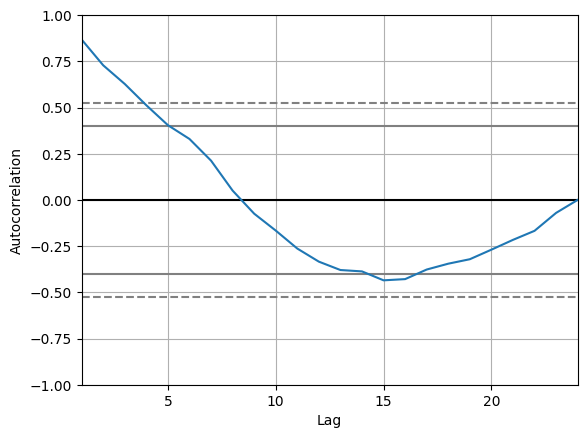

In [40]:
pd.plotting.autocorrelation_plot(rev)

In [41]:
model = ARIMA(rev.squeeze().reset_index(drop=True), order=(1, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

                                    SARIMAX Results                                    
Dep. Variable:     Total Operating Revenue ($)   No. Observations:                   24
Model:                          ARIMA(1, 1, 0)   Log Likelihood                -569.677
Date:                         Sun, 30 Jul 2023   AIC                           1143.354
Time:                                 19:06:41   BIC                           1145.625
Sample:                                      0   HQIC                          1143.925
                                          - 24                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0414      0.172      0.241      0.810      -0.296       0.379
sigma2      1.976e+20   2.44e-22   8.08e+41      0.000    1

<Axes: >

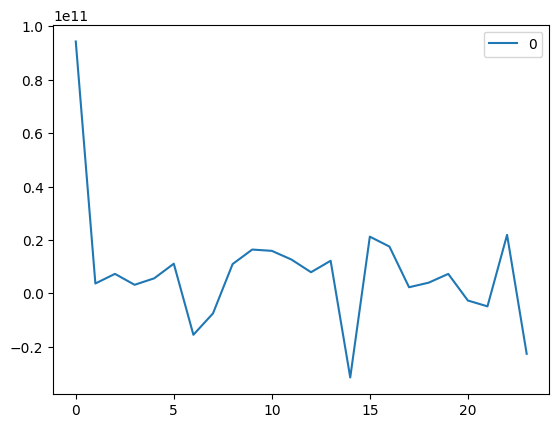

In [42]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

<Axes: ylabel='Density'>

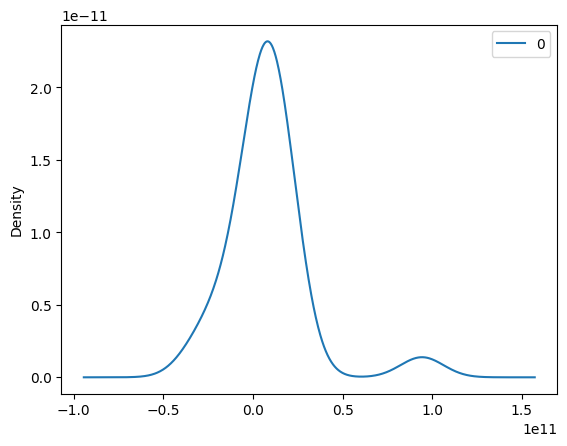

In [43]:
residuals.plot(kind='kde')

predicted=151002519056.328766, expected=174677395010.000061
predicted=175803655504.240326, expected=193040699220.000031
predicted=194607138048.109375, expected=196105250449.999908
predicted=196373544699.234924, expected=200244883860.000061
predicted=200611303568.996796, expected=207713887300.000061
predicted=208392887668.995697, expected=205360892950.000031
predicted=205151303521.913177, expected=200413561330.000031
predicted=199968416736.658081, expected=222127901510.000000
predicted=223889196828.006195, expected=200413561330.000031
Test MSE: 222120127923476627456.000
R squared:  -0.5579803283256788


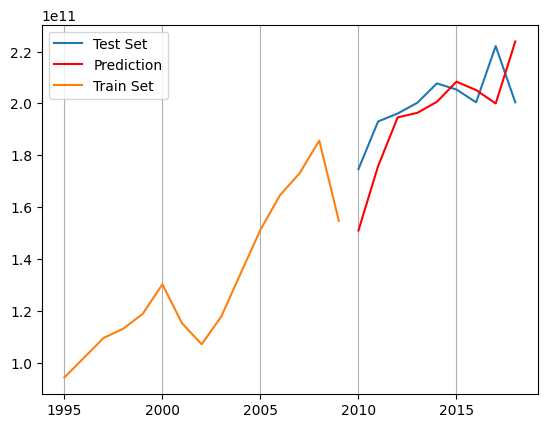

In [44]:
X = rev.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size : len(X)]
train_years, test_years = (1995 + np.arange(0, size)), (1995 + np.arange(size, len(X)))
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(1, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

r_sq = r2_score(test, predictions)
print('R squared: ', r_sq)


plt.plot(test_years, test, label="Test Set")
plt.plot(test_years, predictions, color='red', label="Prediction")
plt.plot(train_years, train, label="Train Set")
plt.grid(axis='x')
plt.legend()
plt.show()

predicted=200695418531.842010
predicted=199608573632.461731
predicted=199582046908.689240
predicted=199526057190.077820
predicted=199522613504.734924
predicted=199519648315.293732
predicted=199519362559.121674
predicted=199519201513.810852
predicted=199519180979.466736
predicted=199519172038.457886
34
24


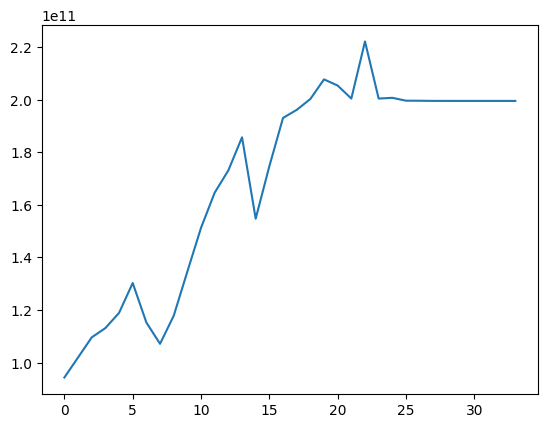

In [45]:
X = rev.values
size = int(len(X))
history = [x for x in X]
predictions = list()
for t in range(10):
    model = ARIMA(history, order=(2, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    history.append(yhat)
    print('predicted=%f' % (yhat))

plt.plot(history)
print(len(history))
print(len(X))

[ 5.55409392e+09 -1.09871107e+13]


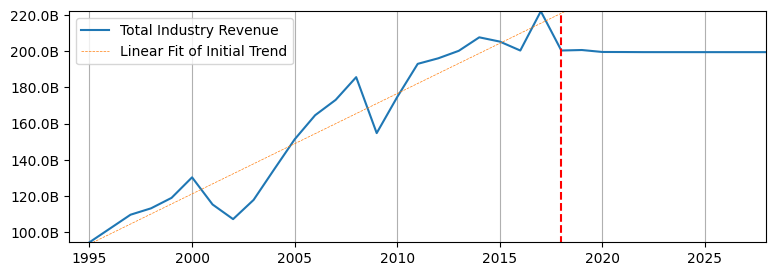

In [46]:
plt.figure(figsize=(9, 3))

ax1 = plt.subplot(111)

px = np.arange(1995, 2029)

ax1.plot(px, history, label="Total Industry Revenue")
ax1.vlines(x=2018, ymin=0, ymax=(300 * 10**11), ls='dashed', color='r')
ax1.set_ylim(min(history), max(history))

c = np.polyfit(Year, rev, 1)
print(c)
p = np.poly1d(c)

py = p(px)
ax1.plot(px, py, lw=0.5, ls='--', label="Linear Fit of Initial Trend")
ax1.set_xlim(1994, 2028)
ax1.grid(axis='x')
ax1.yaxis.set_major_formatter(formatter)
plt.legend()
plt.show()

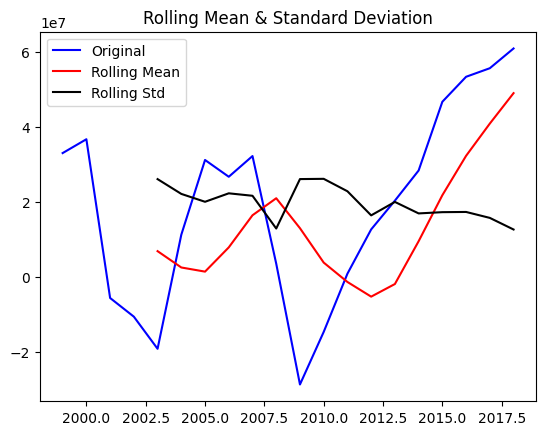

ADF Statistic: -1.8457775936471914
p-value: 0.357982694373233
Critical Values:
	1%: -4.223238279489106
	5%: -3.189368925619835
	10%: -2.729839421487603


In [47]:
passengers = df["Total Enplaned Passengers"]
rolling_mean = passengers.rolling(window=5).mean()
passengers_minus_mean = passengers - rolling_mean
passengers_minus_mean.dropna(inplace=True)

get_stationarity(passengers_minus_mean)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

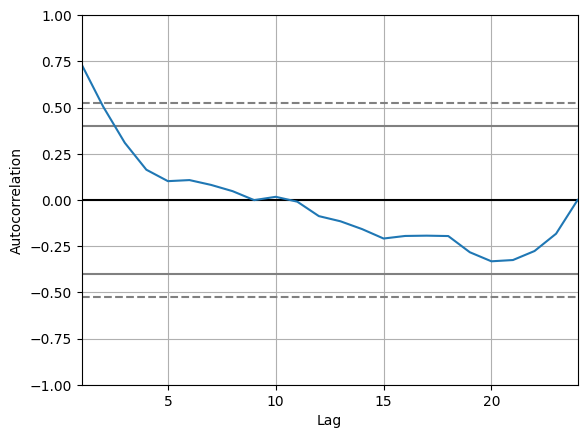

In [48]:
pd.plotting.autocorrelation_plot(passengers)

In [49]:
model1 = ARIMA(passengers.squeeze().reset_index(drop=True), order=(1, 1, 0))
model_fit1 = model1.fit()
print(model_fit1.summary())

                                   SARIMAX Results                                   
Dep. Variable:     Total Enplaned Passengers   No. Observations:                   24
Model:                        ARIMA(1, 1, 0)   Log Likelihood                -420.389
Date:                       Sun, 30 Jul 2023   AIC                            844.779
Time:                               19:06:43   BIC                            847.050
Sample:                                    0   HQIC                           845.350
                                        - 24                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0758      0.085      0.895      0.371      -0.090       0.242
sigma2      3.824e+14   9.66e-18   3.96e+31      0.000    3.82e+14    3.82e

<Axes: >

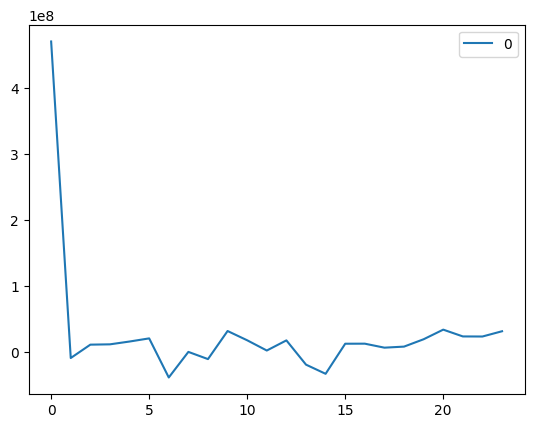

In [50]:
residuals1 = pd.DataFrame(model_fit1.resid)
residuals1.plot()

<Axes: ylabel='Density'>

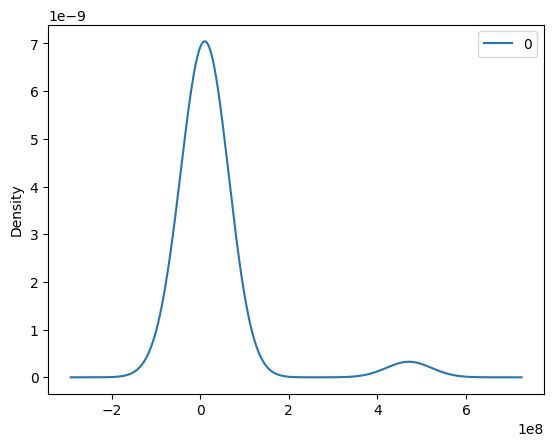

In [51]:
residuals1.plot(kind='kde')

predicted=540164468.882457, expected=552919514.000000
predicted=553560256.953959, expected=567022189.000000
predicted=567877674.751144, expected=575338160.000000
predicted=575846444.274110, expected=584814665.000000
predicted=585396973.316779, expected=605529024.000000
predicted=606819145.675051, expected=641648148.000000
predicted=644011392.137502, expected=668648686.000000
predicted=670519544.114898, expected=694836039.000000
predicted=696724906.026544, expected=728935700.000000
Test MSE: 481576100214131.500
R squared:  0.8596271872122054


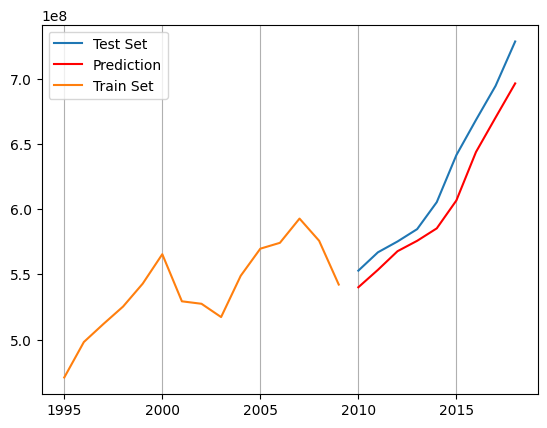

In [52]:
X1 = passengers.values
size1 = int(len(X1) * 0.66)
train1, test1 = X1[0:size1], X1[size1 : len(X1)]
train_years1, test_years1 = (1995 + np.arange(0, size1)), (
    1995 + np.arange(size1, len(X1))
)
history1 = [x for x in train1]
predictions1 = list()
for t in range(len(test1)):
    model1 = ARIMA(history1, order=(1, 1, 0))
    model_fit1 = model1.fit()
    output1 = model_fit1.forecast()
    yhat1 = output1[0]
    predictions1.append(yhat1)
    obs1 = test1[t]
    history1.append(obs1)
    print('predicted=%f, expected=%f' % (yhat1, obs1))

error1 = mean_squared_error(test1, predictions1)
print('Test MSE: %.3f' % error1)


r_sq1 = r2_score(test1, predictions1)
print('R squared: ', r_sq1)

plt.plot(test_years1, test1, label="Test Set")
plt.plot(test_years1, predictions1, color='red', label="Prediction")
plt.plot(train_years1, train1, label="Train Set")
plt.grid(axis='x')
plt.legend()
plt.show()

predicted=732219422.728733
predicted=733595361.526925
predicted=733802613.815777
predicted=733863415.000407
predicted=733874660.029999
predicted=733877494.171015
predicted=733878071.561000
predicted=733878207.432381
predicted=733878236.400319
predicted=733878243.005296
34
24


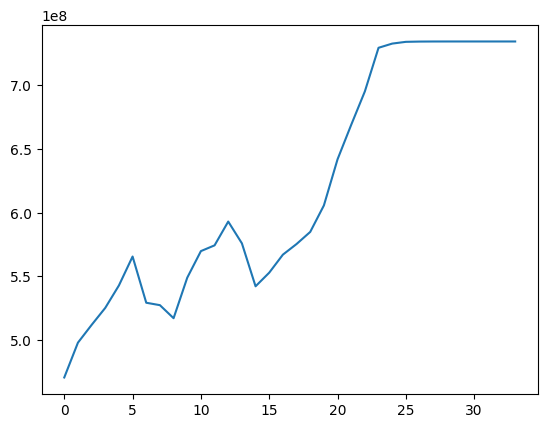

In [53]:
X1 = passengers.values
size1 = int(len(X1))
history1 = [x for x in X1]
predictions1 = list()
for t in range(10):
    model1 = ARIMA(history1, order=(2, 1, 0))
    model_fit1 = model1.fit()
    output1 = model_fit1.forecast()
    yhat1 = output1[0]
    history1.append(yhat1)
    print('predicted=%f' % (yhat1))

plt.plot(history1)
print(len(history1))
print(len(X1))

[ 7.53180499e+06 -1.45412014e+10]


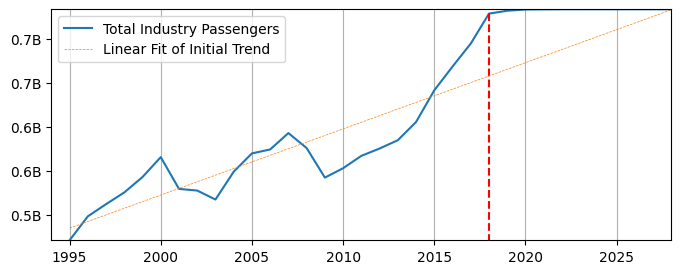

In [54]:
plt.figure(figsize=(8, 3))

ax1 = plt.subplot(111)
px = np.arange(1995, 2029)
ax1.plot(px, history1, label="Total Industry Passengers")
ax1.vlines(x=2018, ymin=0, ymax=(300 * 10**11), ls='dashed', color='r')
ax1.set_ylim(min(history1), max(history1))

c = np.polyfit(Year, passengers, 1)
print(c)
p = np.poly1d(c)

py = p(px)
ax1.plot(px, py, lw=0.5, ls='--', label="Linear Fit of Initial Trend")
ax1.set_xlim(1994, 2028)
ax1.grid(axis='x')
ax1.yaxis.set_major_formatter(formatter)
plt.legend()
plt.show()

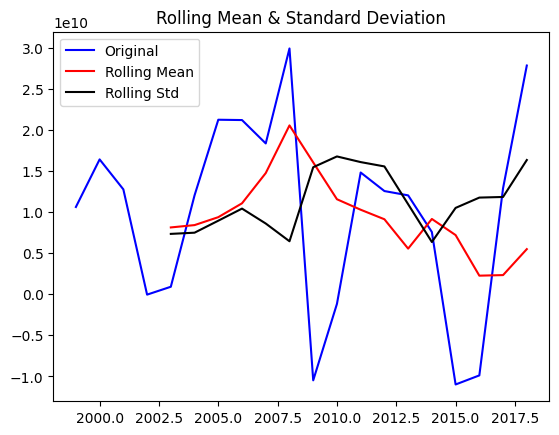

ADF Statistic: -3.486900323537112
p-value: 0.008329964321485795
Critical Values:
	1%: -3.859073285322359
	5%: -3.0420456927297668
	10%: -2.6609064197530863


In [55]:
exp = df["Total Operating Expenses ($)"]
rolling_mean = exp.rolling(window=5).mean()
exp_minus_mean = exp - rolling_mean
exp_minus_mean.dropna(inplace=True)

get_stationarity(exp_minus_mean)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

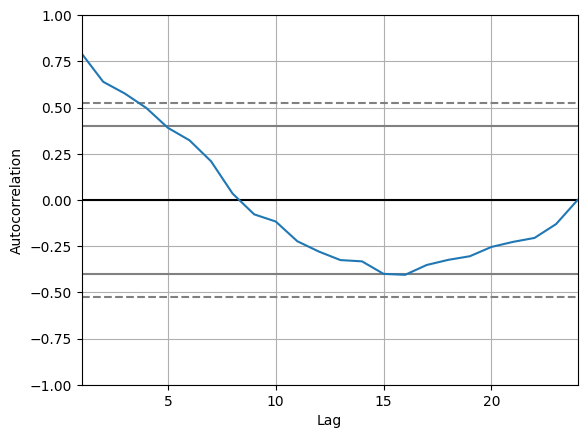

In [56]:
pd.plotting.autocorrelation_plot(exp)

In [57]:
model2 = ARIMA(exp.squeeze().reset_index(drop=True), order=(2, 1, 0))
model_fit2 = model2.fit()
print(model_fit2.summary())

                                    SARIMAX Results                                     
Dep. Variable:     Total Operating Expenses ($)   No. Observations:                   24
Model:                           ARIMA(2, 1, 0)   Log Likelihood                -570.958
Date:                          Sun, 30 Jul 2023   AIC                           1147.916
Time:                                  19:06:44   BIC                           1151.323
Sample:                                       0   HQIC                          1148.773
                                           - 24                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0631      0.171      0.370      0.712      -0.271       0.397
ar.L2         -0.0374      0.181     -0.206      0.

<Axes: >

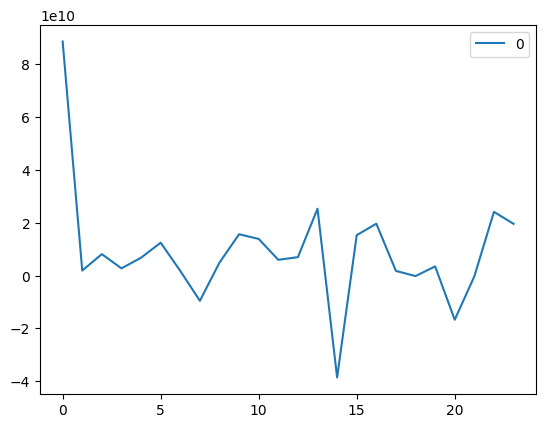

In [58]:
residuals2 = pd.DataFrame(model_fit2.resid)
residuals2.plot()

<Axes: ylabel='Density'>

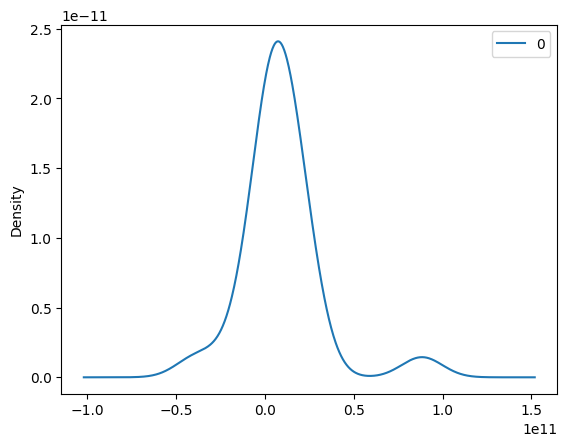

In [59]:
residuals2.plot(kind='kde')

predicted=151927227322.160889, expected=164152976630.000000
predicted=161186200072.294220, expected=185895476149.999939
predicted=186361370649.943756, expected=188574523300.000031
predicted=188644861190.817719, expected=187725860459.999939
predicted=187698285489.224854, expected=191035957879.999969
predicted=191124670679.822510, expected=174572436249.999939
predicted=174214865546.337280, expected=173121583029.999939
predicted=173089770648.988403, expected=197726952170.000000
predicted=198269777532.203308, expected=218881654370.000000
Test MSE: 231545760640261521408.000
R squared:  -0.031194296751967387


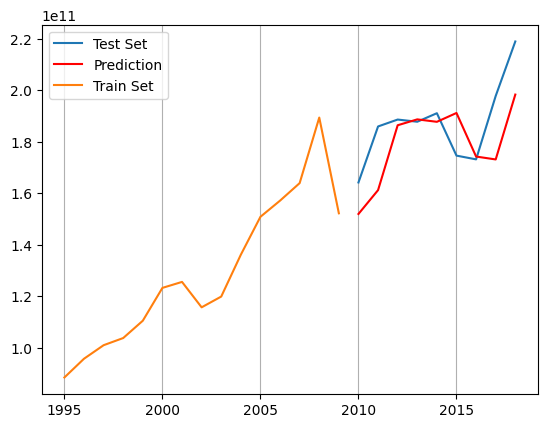

In [60]:
X2 = exp.values
size2 = int(len(X2) * 0.66)
train2, test2 = X2[0:size2], X2[size2 : len(X2)]
train_years2, test_years2 = (1995 + np.arange(0, size2)), (
    1995 + np.arange(size2, len(X2))
)
history2 = [x for x in train2]
predictions2 = list()
for t in range(len(test2)):
    model2 = ARIMA(history2, order=(2, 1, 0))
    model_fit2 = model2.fit()
    output2 = model_fit2.forecast()
    yhat2 = output2[0]
    predictions2.append(yhat2)
    obs2 = test2[t]
    history2.append(obs2)
    print('predicted=%f, expected=%f' % (yhat2, obs2))

error2 = mean_squared_error(test2, predictions2)
print('Test MSE: %.3f' % error2)


r_sq2 = r2_score(test2, predictions2)
print('R squared: ', r_sq2)

# plot
#
plt.plot(test_years2, test2, label="Test Set")
plt.plot(test_years2, predictions2, color='red', label="Prediction")
plt.plot(train_years2, train2, label="Train Set")
plt.grid(axis='x')
plt.legend()
plt.show()

predicted=219295532873.354584
predicted=218530109884.943726
predicted=218466346488.254639
predicted=218491002961.554779
predicted=218494948320.165070
predicted=218494272265.409912
predicted=218494081559.851776
predicted=218494094916.867401
predicted=218494102923.162659
predicted=218494102926.162323
34
24


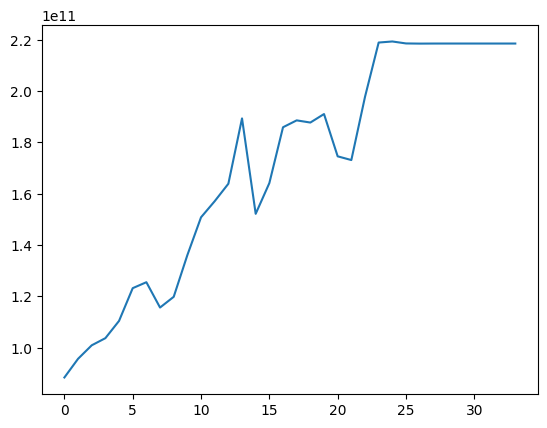

In [61]:
X2 = exp.values
size2 = int(len(X2))
history2 = [x for x in X2]
predictions2 = list()
for t in range(10):
    model2 = ARIMA(history2, order=(2, 1, 0))
    model_fit2 = model2.fit()
    output2 = model_fit2.forecast()
    yhat2 = output2[0]
    history2.append(yhat2)
    print('predicted=%f' % (yhat2))

plt.plot(history2)
print(len(history2))
print(len(X2))

In [62]:
prediction_years = np.arange(1995, 2029)
len(prediction_years)

34

[ 5.04375568e+09 -9.96967433e+12]


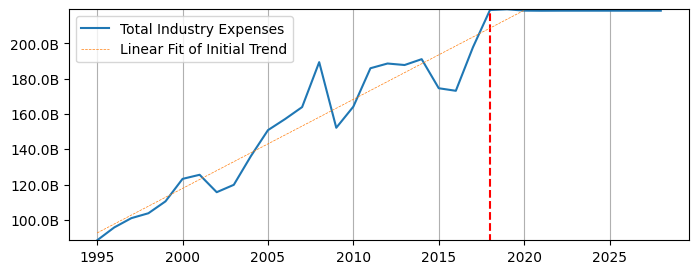

In [63]:
plt.figure(figsize=(8, 3))

ax1 = plt.subplot(111)

# ax1.plot(test_years2, test2, label="Test Set")
ax1.plot(prediction_years, history2, label="Total Industry Expenses")
ax1.vlines(x=2018, ymin=0, ymax=(300 * 10**11), ls='dashed', color='r')
ax1.set_ylim(min(history2), max(history2))

c = np.polyfit(Year, exp, 1)
print(c)
p = np.poly1d(c)
px = np.arange(1995, 2025)
py = p(px)
ax1.plot(px, py, lw=0.5, ls='--', label="Linear Fit of Initial Trend")

ax1.grid(axis='x')
ax1.yaxis.set_major_formatter(formatter)
plt.legend()
plt.show()

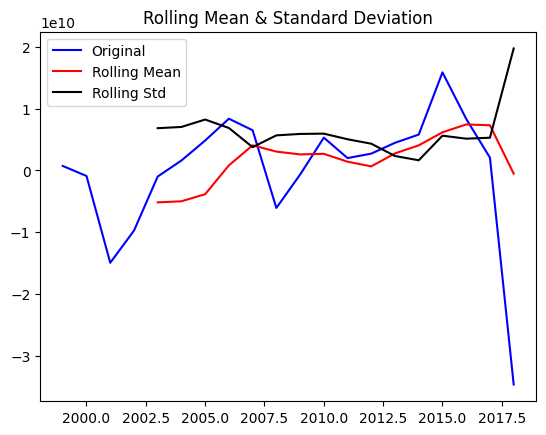

ADF Statistic: -2.5380340925284295
p-value: 0.10649228644273889
Critical Values:
	1%: -3.889265672705068
	5%: -3.0543579727254224
	10%: -2.66698384083045


In [64]:
prof = df["Total Profits"]
rolling_mean = prof.rolling(window=5).mean()
prof_minus_mean = prof - rolling_mean
prof_minus_mean.dropna(inplace=True)

get_stationarity(prof_minus_mean)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

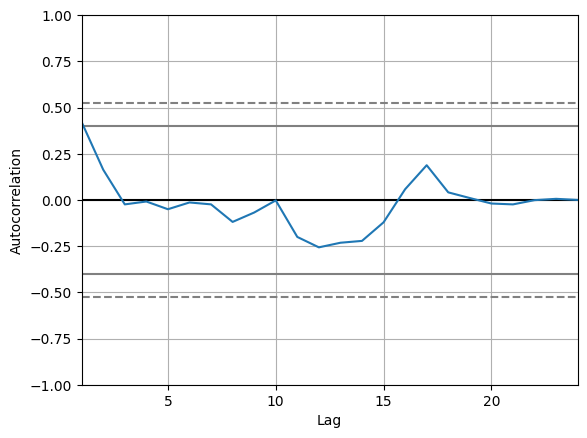

In [65]:
pd.plotting.autocorrelation_plot(prof)

In [66]:
model3 = ARIMA(exp.squeeze().reset_index(drop=True), order=(1, 1, 0))
model_fit3 = model3.fit()
print(model_fit3.summary())

                                    SARIMAX Results                                     
Dep. Variable:     Total Operating Expenses ($)   No. Observations:                   24
Model:                           ARIMA(1, 1, 0)   Log Likelihood                -570.997
Date:                          Sun, 30 Jul 2023   AIC                           1145.994
Time:                                  19:06:46   BIC                           1148.265
Sample:                                       0   HQIC                          1146.565
                                           - 24                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0614      0.172      0.356      0.721      -0.276       0.399
sigma2      2.234e+20   2.62e-22   8.53e+41      0.

<Axes: >

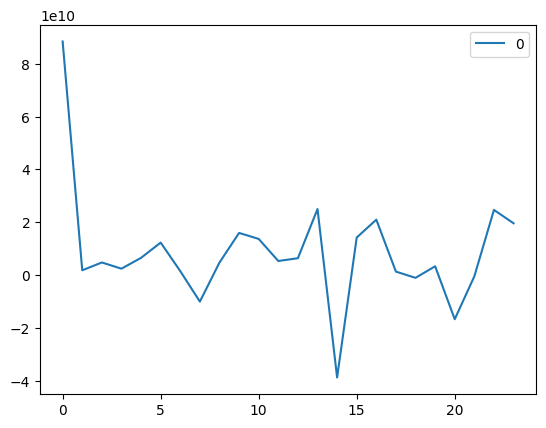

In [67]:
residuals3 = pd.DataFrame(model_fit3.resid)
residuals3.plot()

<Axes: ylabel='Density'>

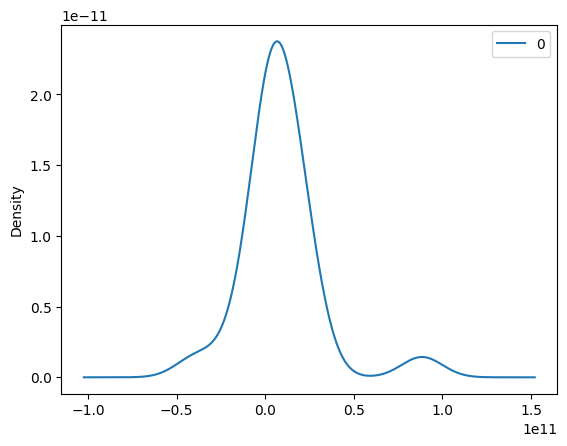

In [68]:
residuals3.plot(kind='kde')

predicted=5745582114.075227, expected=10524418380.000061
predicted=7697956247.857662, expected=7145223070.000092
predicted=4236873667.143879, expected=7530727149.999878
predicted=8711508598.646105, expected=12519023400.000122
predicted=11998984557.868139, expected=16677929420.000092
predicted=14643721599.132500, expected=30788456700.000092
predicted=30377246555.403606, expected=27291978300.000092
predicted=23347835869.352715, expected=24400949340.000000
predicted=25326382557.201813, expected=-18468093039.999969
Test MSE: 251068716363921620992.000
R squared:  -0.310098694609815


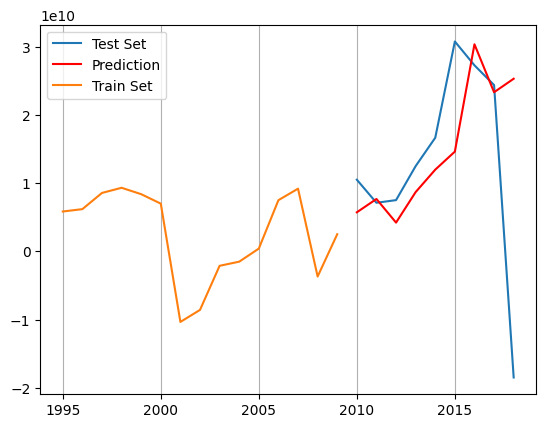

In [69]:
X3 = prof.values
size3 = int(len(X3) * 0.66)
train3, test3 = X3[0:size3], X3[size3 : len(X3)]
train_years3, test_years3 = (1995 + np.arange(0, size3)), (
    1995 + np.arange(size3, len(X3))
)
history3 = [x for x in train3]
predictions3 = list()
for t in range(len(test3)):
    model3 = ARIMA(history3, order=(2, 1, 0))
    model_fit3 = model3.fit()
    output3 = model_fit3.forecast()
    yhat3 = output3[0]
    predictions3.append(yhat3)
    obs3 = test3[t]
    history3.append(obs3)
    print('predicted=%f, expected=%f' % (yhat3, obs3))

error3 = mean_squared_error(test3, predictions3)
print('Test MSE: %.3f' % error3)


r_sq3 = r2_score(test3, predictions3)
print('R squared: ', r_sq3)

# plot
#
plt.plot(test_years3, test3, label="Test Set")
plt.plot(test_years3, predictions3, color='red', label="Prediction")
plt.plot(train_years3, train3, label="Train Set")
plt.grid(axis='x')
plt.legend()
plt.show()

predicted=-23687572680.397659
predicted=-19749480061.108257
predicted=-18678937391.477505
predicted=-18965921095.973045
predicted=-19118705831.793240
predicted=-19107357029.224182
predicted=-19089326903.427238
predicted=-19088230669.248119
predicted=-19090048669.759228
predicted=-19090402753.061119
34
24


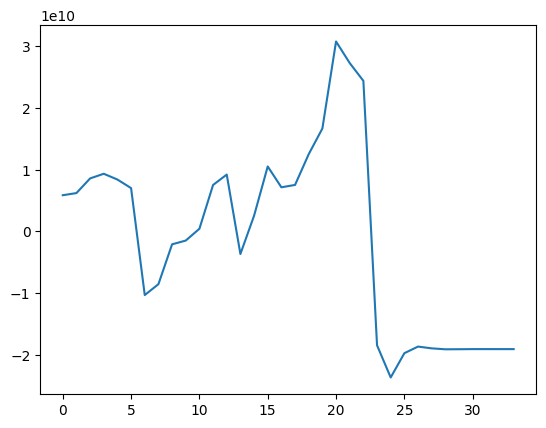

In [70]:
X3 = prof.values
size3 = int(len(X3))
history3 = [x for x in X3]
predictions3 = list()
for t in range(10):
    model3 = ARIMA(history3, order=(2, 1, 0))
    model_fit3 = model3.fit()
    output3 = model_fit3.forecast()
    yhat3 = output3[0]
    history3.append(yhat3)
    print('predicted=%f' % (yhat3))

plt.plot(history3)
print(len(history3))
print(len(X3))

[ 5.10338244e+08 -1.01743641e+12]


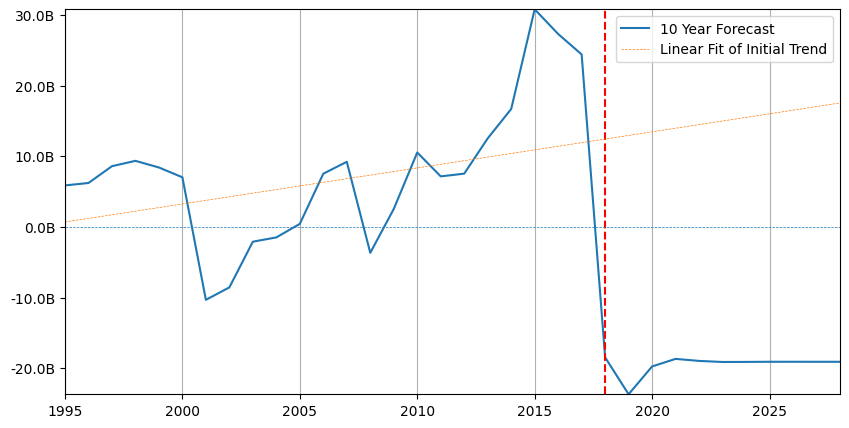

In [71]:
plt.figure(figsize=(10, 5))

ax1 = plt.subplot(111)
px = np.arange(1995, 2029)
# ax1.plot(test_years2, test2, label="Test3Set")
ax1.plot(px, history3, label="10 Year Forecast")
ax1.vlines(x=2018, ymin=min(history3), ymax=(300 * 10**11), ls='dashed', color='r')
ax1.hlines(y=0, xmin=1990, xmax=2030, ls='dashed', lw=0.5)
ax1.set_ylim(min(history3), max(history3))
ax1.set_xlim(min(prediction_years), max(prediction_years))

c = np.polyfit(Year, prof, 1)
print(c)
p = np.poly1d(c)

py = p(px)
ax1.plot(px, py, lw=0.5, ls='--', label="Linear Fit of Initial Trend")

ax1.grid(axis='x')
ax1.yaxis.set_major_formatter(formatter)
plt.legend()
plt.show()

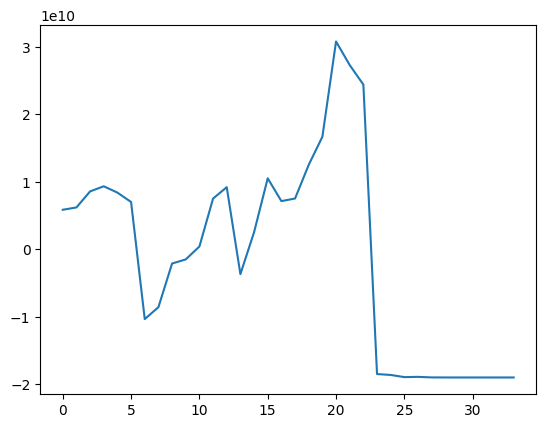

In [72]:
prof_alternate = np.array(history) - np.array(history2)
plt.plot(prof_alternate)

[ 5.10338244e+08 -1.01743641e+12]


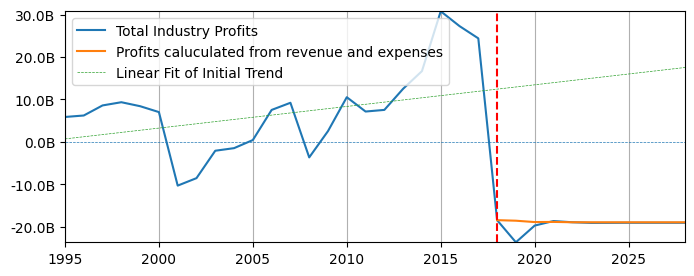

In [73]:
plt.figure(figsize=(8, 3))

ax1 = plt.subplot(111)

# ax1.plot(test_years2, test2, label="Test3Set")
ax1.plot(prediction_years, history3, label="Total Industry Profits")
plt.plot(
    prediction_years[23:],
    prof_alternate[23:],
    label='Profits caluculated from revenue and expenses',
)
ax1.vlines(x=2018, ymin=min(history3), ymax=(300 * 10**11), ls='dashed', color='r')
ax1.hlines(y=0, xmin=1990, xmax=2030, ls='dashed', lw=0.5)
ax1.set_ylim(min(history3), max(history3))
ax1.set_xlim(min(prediction_years), max(prediction_years))

c = np.polyfit(Year, prof, 1)
print(c)
p = np.poly1d(c)
px = np.arange(1995, 2030)
py = p(px)
ax1.plot(px, py, lw=0.5, ls='--', label="Linear Fit of Initial Trend")

ax1.grid(axis='x')
ax1.yaxis.set_major_formatter(formatter)
plt.legend()
plt.show()